#
# Prédiction des Emissions de CO2

In [4]:

# Import des librairies utilisées

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import category_encoders as ce
from datetime import datetime, date
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
import shap




In [5]:

# Lecture des données

df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

##
## Partie analyse exploratoire

##
### Features engineering

In [6]:

# Filtrage des bâtiments résidentiels

df1 = df[(df['BuildingType']=='NonResidential')|(df['BuildingType']=='Nonresidential COS')|(df['BuildingType']=='Nonresidential WA')]

In [7]:

# Fonction pour calculer l'âge des bâtiments

def years_build(year_b):
    year_b = str(year_b)
    year_b = datetime.strptime(year_b, "%Y").date()
    today= date.today()
    return today.year - year_b.year

df1['How_old_Building_is'] = df1['YearBuilt'].apply(years_build)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df2 = df1

In [9]:

# Création d'une colonne pour savoir si le bâtiment utilise du gaz

df2['Gas_used'] = df2['NaturalGas(kBtu)']!= 0.0
df2['Gas_used'] = df2['Gas_used'].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,95,1
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,26,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,53,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,96,1
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,18,1
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99,48,1
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57,33,1


In [10]:

# Création d'une colonne pour savoir si le bâtiment utilise de l'électricité

df2['Electricity_used'] = df2['Electricity(kBtu)']!= 0.0
df2['Electricity_used'] = df2['Electricity_used'].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:

# Création d'une colonne pour savoir si le bâtiment utilise de l'électricité

df2['Steam_used'] = df2['SteamUse(kBtu)']!= 0.0
df2['Steam_used'] = df2['Steam_used'].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,False,NaN,Compliant,NaN,249.98,2.83,95,1,1,1
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,False,NaN,Compliant,NaN,295.86,2.86,26,1,1,0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,False,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,False,NaN,Compliant,NaN,286.43,4.67,96,1,1,1
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,False,NaN,Compliant,NaN,505.01,2.88,42,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,False,NaN,Compliant,NaN,32.17,2.01,18,1,1,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,False,NaN,Compliant,NaN,223.54,16.99,48,1,1,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,False,NaN,Compliant,NaN,22.11,1.57,33,1,1,0


In [12]:

# Création d'une colonne pour savoir si un bâtiment a un parking

df2['Parking_used'] = df2['PropertyGFAParking']!= 0.0
df2['Parking_used'] = df2['Parking_used'].astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [13]:

# Information sur les outliers

df2['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [14]:

# Filtrage des outliers

df2 = df2[(df2['Outlier']!='High outlier')]
df2 = df2[(df2['Outlier']!='Low outlier')]

In [15]:

# Filtrage des valeurs nulles et négatives

df3 = df2.loc[-(df2['TotalGHGEmissions']<=0)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [16]:

# Filtrage des NaN pour 'TotalGHGEmissions'

df4 = df3.loc[-(df3['TotalGHGEmissions'].isna())]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


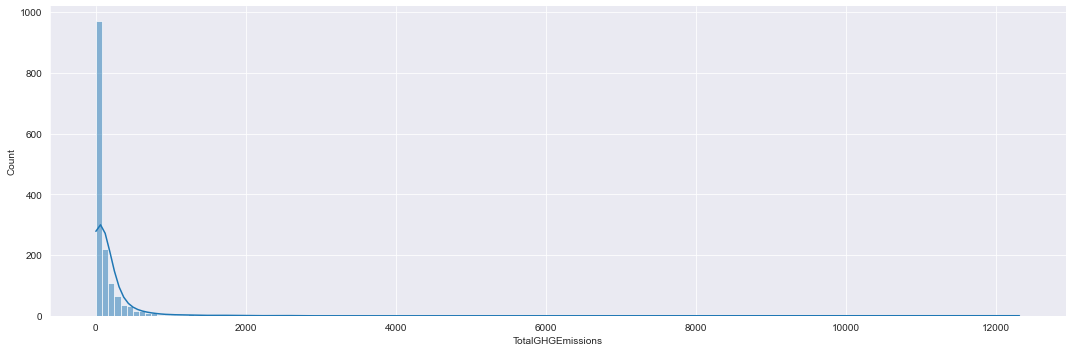

In [17]:

# Affichage de la distribution de la variable 'TotalGHGEmissions'

sns.displot(data = df4, x = 'TotalGHGEmissions', kde = True, aspect = 3, bins=150)

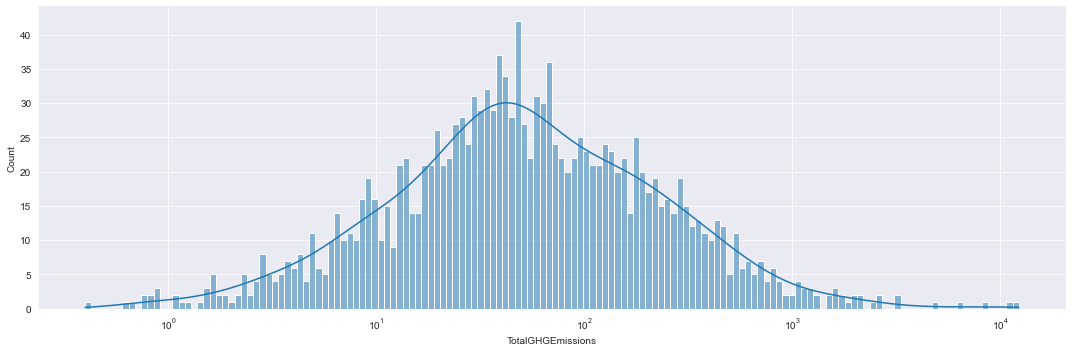

In [18]:

# Affichage de la distribution de la variable 'TotalGHGEmissions' avec échelle logarithmique

sns.displot(data = df4, x = 'TotalGHGEmissions', kde = True, aspect = 3, bins=150, log_scale=True)

In [19]:

# Information sur la variable 'SiteEnergyUseWN(kBtu)'

df4["SiteEnergyUseWN(kBtu)"].describe()

count    1.523000e+03
mean     7.789137e+06
std      1.890064e+07
min      0.000000e+00
25%      1.292564e+06
50%      2.762806e+06
75%      7.227405e+06
max      2.966717e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [20]:

# Filtrage des valeurs nulles ou négative pour la variable 'SiteEnergyUseWN(kBtu)'

df5 = df4.loc[-(df3['SiteEnergyUseWN(kBtu)'] <= 0.0)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [21]:

# Filtrage des NaN pour la variable 'SiteEnergyUseWN(kBtu)'

df6 = df5.loc[-(df3['SiteEnergyUseWN(kBtu)'].isna())]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,How_old_Building_is,Gas_used,Electricity_used,Steam_used,Parking_used
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,NaN,Compliant,NaN,249.98,2.83,95,1,1,1,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,NaN,Compliant,NaN,295.86,2.86,26,1,1,0,1
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,NaN,Compliant,NaN,2089.28,2.19,53,1,1,1,1
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,NaN,Compliant,NaN,286.43,4.67,96,1,1,1,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,NaN,Compliant,NaN,505.01,2.88,42,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,NaN,Error - Correct Default Data,NaN,20.94,1.70,32,1,1,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,NaN,Compliant,NaN,32.17,2.01,18,1,1,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,NaN,Compliant,NaN,223.54,16.99,48,1,1,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,NaN,Compliant,NaN,22.11,1.57,33,1,1,0,0


In [22]:

# Sélection des features pertinentes pour notre étude

df7 = df6[['PrimaryPropertyType','Neighborhood', 'PropertyGFATotal', 'Parking_used', 'NumberofBuildings', 'NumberofFloors', 'How_old_Building_is', 'Electricity_used', 'Gas_used', 'Steam_used','SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

,PrimaryPropertyType,Neighborhood,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,Hotel,DOWNTOWN,88434,0,1.0,12,95,1,1,1,7.456910e+06,249.98
1,Hotel,DOWNTOWN,103566,1,1.0,11,26,1,1,0,8.664479e+06,295.86
2,Hotel,DOWNTOWN,956110,1,1.0,41,53,1,1,1,7.393711e+07,2089.28
3,Hotel,DOWNTOWN,61320,0,1.0,10,96,1,1,1,6.946800e+06,286.43
4,Hotel,DOWNTOWN,175580,1,1.0,18,42,1,1,0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Office,GREATER DUWAMISH,12294,0,1.0,1,32,1,1,0,9.430032e+05,20.94
3372,Other,DOWNTOWN,16000,0,1.0,1,18,1,1,0,1.053706e+06,32.17
3373,Other,MAGNOLIA / QUEEN ANNE,13157,0,1.0,1,48,1,1,0,6.053764e+06,223.54
3374,Mixed Use Property,GREATER DUWAMISH,14101,0,1.0,1,33,1,1,0,7.828413e+05,22.11


##
### One-Hot encoding

In [23]:

# Préparation des données pour le One-Hot encoding, sélection des variables catégorielles

categorial_df7 = df7.select_dtypes(include = 'object')
categorial_df7

,PrimaryPropertyType,Neighborhood
0,Hotel,DOWNTOWN
1,Hotel,DOWNTOWN
2,Hotel,DOWNTOWN
3,Hotel,DOWNTOWN
4,Hotel,DOWNTOWN
...,...,...
3371,Office,GREATER DUWAMISH
3372,Other,DOWNTOWN
3373,Other,MAGNOLIA / QUEEN ANNE
3374,Mixed Use Property,GREATER DUWAMISH


In [24]:

# Préparation des données pour le One-Hot encoding, sélection des variables numériques

numerical_df7 = df7.select_dtypes(include = ('int32', 'int64', 'float64'))
numerical_df7

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,88434,0,1.0,12,95,1,1,1,7.456910e+06,249.98
1,103566,1,1.0,11,26,1,1,0,8.664479e+06,295.86
2,956110,1,1.0,41,53,1,1,1,7.393711e+07,2089.28
3,61320,0,1.0,10,96,1,1,1,6.946800e+06,286.43
4,175580,1,1.0,18,42,1,1,0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,9.430032e+05,20.94
3372,16000,0,1.0,1,18,1,1,0,1.053706e+06,32.17
3373,13157,0,1.0,1,48,1,1,0,6.053764e+06,223.54
3374,14101,0,1.0,1,33,1,1,0,7.828413e+05,22.11


In [25]:

# Création des variables dummies (pour les variables catégorielles)

categorial_df7_dummies = pd.get_dummies(categorial_df7)
categorial_df7_dummies

,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3374,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:

# Concaténation de toutes les variables

df7_v1 = pd.concat([numerical_df7, categorial_df7_dummies], axis = 1)
df7_v1

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,7.456910e+06,249.98,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,8.664479e+06,295.86,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,7.393711e+07,2089.28,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,6.946800e+06,286.43,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,1.465650e+07,505.01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,9.430032e+05,20.94,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,1.053706e+06,32.17,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,6.053764e+06,223.54,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,7.828413e+05,22.11,...,1,0,0,0,0,0,0,0,0,0


In [27]:

# Passage au log pour les variables 'SiteEnergyUseWN(kBtu)' et 'TotalGHGEmissions'

df7_v1['SiteEnergyUseWN(kBtu)'] = np.log(df7_v1['SiteEnergyUseWN(kBtu)'])
df7_v1['TotalGHGEmissions'] = np.log(df7_v1['TotalGHGEmissions'])

In [28]:
df8 = df7_v1
df8

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,15.824652,5.521381,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,15.974742,5.689886,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,18.118725,7.644575,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,15.753792,5.657494,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,16.500395,6.224578,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,13.756825,3.041661,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,13.867824,3.471034,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,15.616191,5.409590,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,13.570685,3.096030,...,1,0,0,0,0,0,0,0,0,0


##
## Section 1 : Modélisation

In [29]:
# On crée X et y dans le but de séparer les données d'entraînements et les données de tests

y = df8['TotalGHGEmissions']
X = df8.drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],axis = 1)



In [30]:
X

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
y

0       5.521381
1       5.689886
2       7.644575
3       5.657494
4       6.224578
          ...   
3371    3.041661
3372    3.471034
3373    5.409590
3374    3.096030
3375    3.720136
Name: TotalGHGEmissions, Length: 1515, dtype: float64

In [32]:

# On sépare jeu d'entrainement / jeu de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)


In [33]:

# Mise à l'échelle de nos données

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


##
### Elastic Net

In [34]:

# Instantiation

elastic_net_model = ElasticNet(random_state = 50)


In [36]:

# Paramètres de la grille

param_grid = {'max_iter': [1000],
              "alpha": [0.1, 0.5, 1],
              "l1_ratio": [0,0.4, 0.5, 0.7, 1]
             }



In [38]:

# Paramètres du GridSearchCV

grid_model = GridSearchCV(estimator = elastic_net_model,
                          param_grid = param_grid,
                          scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error'],
                          cv = 10,
                          refit = 'r2',
                          verbose = 1
                          )


In [39]:

# Entraînement du GridSearchCV

grid_model.fit(X_train, y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.4415225037588, tolerance: 0.2466428792595869
Objective did not converge. You might want to increase the number of iterations. Duality gap: 510.27258680671184, tolerance: 0.24735867540565978
Objective did not converge. You might want to increase the number of iterations. Duality gap: 508.73296543805805, tolerance: 0.24254098129758186
Objective did not converge. You might want to increase the number of iterations. Duality gap: 525.7939321224849, tolerance: 0.24811884612546056
Objective did not converge. You might want to increase the number of iterations. Duality gap: 524.0879828596285, tolerance: 0.25241801377930206
Objective did not converge. You might want to increase the number of iterations. Duality gap: 509.4627887503838, tolerance: 0.24646036993351284
Objective did not converge. You might want to increase the number of iterations. Duality gap: 519.0489418139168, tolerance: 0.252269851

GridSearchCV(cv=10, estimator=ElasticNet(random_state=50),
             param_grid={'alpha': [0.1, 0.5, 1],
                         'l1_ratio': [0, 0.4, 0.5, 0.7, 1],
                         'max_iter': [1000]},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_mean_absolute_error'],
             verbose=1)

In [40]:

# Obtention du meilleur estimateur

grid_model.best_estimator_


ElasticNet(alpha=0.1, l1_ratio=0, random_state=50)

In [41]:

# Affichage du meilleur score (r2)

grid_model.best_score_

0.5912940266252174

In [42]:

# Affichage des meilleurs paramètres

grid_model.best_params_


{'alpha': 0.1, 'l1_ratio': 0, 'max_iter': 1000}

In [43]:

# On place les différents résultats dans un DataFrame

r2_elastic_net= pd.DataFrame(grid_model.cv_results_)
r2_elastic_net


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_r2,split1_test_r2,...,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,split5_test_neg_mean_absolute_error,split6_test_neg_mean_absolute_error,split7_test_neg_mean_absolute_error,split8_test_neg_mean_absolute_error,split9_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,0.126396,0.024351,0.003634,0.001015,0.1,0,1000,"{'alpha': 0.1, 'l1_ratio': 0, 'max_iter': 1000}",0.565454,0.547680,...,-0.706681,-0.694294,-0.818548,-0.713868,-0.768562,-0.673241,-0.790767,-0.754485,0.050044,1
1,0.006074,0.000742,0.003116,0.000393,0.1,0.4,1000,"{'alpha': 0.1, 'l1_ratio': 0.4, 'max_iter': 1000}",0.576843,0.555356,...,-0.747425,-0.711852,-0.823148,-0.717834,-0.766034,-0.673441,-0.797040,-0.762630,0.048195,2
2,0.006486,0.001230,0.003092,0.000838,0.1,0.5,1000,"{'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000}",0.574109,0.551761,...,-0.755610,-0.717888,-0.826871,-0.720932,-0.765502,-0.676391,-0.803362,-0.767059,0.048721,3
3,0.006885,0.000746,0.004037,0.001168,0.1,0.7,1000,"{'alpha': 0.1, 'l1_ratio': 0.7, 'max_iter': 1000}",0.563367,0.542352,...,-0.772858,-0.731376,-0.840793,-0.728838,-0.769552,-0.686118,-0.818109,-0.778613,0.049898,4
4,0.007480,0.001340,0.004381,0.000627,0.1,1,1000,"{'alpha': 0.1, 'l1_ratio': 1, 'max_iter': 1000}",0.534417,0.522441,...,-0.803880,-0.759422,-0.870299,-0.749011,-0.789398,-0.717317,-0.848144,-0.804309,0.049461,6
5,0.130738,0.024087,0.003694,0.000593,0.5,0,1000,"{'alpha': 0.5, 'l1_ratio': 0, 'max_iter': 1000}",0.541754,0.511473,...,-0.739152,-0.741277,-0.843747,-0.723771,-0.794894,-0.688422,-0.838727,-0.789461,0.060719,5
6,0.006307,0.002218,0.003435,0.000548,0.5,0.4,1000,"{'alpha': 0.5, 'l1_ratio': 0.4, 'max_iter': 1000}",0.397970,0.373709,...,-0.930636,-0.866567,-0.965519,-0.857880,-0.909031,-0.814119,-0.998689,-0.926459,0.066383,8
7,0.004331,0.000793,0.002865,0.000665,0.5,0.5,1000,"{'alpha': 0.5, 'l1_ratio': 0.5, 'max_iter': 1000}",0.374807,0.343374,...,-0.949690,-0.880415,-0.986696,-0.878514,-0.935040,-0.836247,-1.023733,-0.948691,0.070182,9
8,0.004558,0.000891,0.002616,0.000611,0.5,0.7,1000,"{'alpha': 0.5, 'l1_ratio': 0.7, 'max_iter': 1000}",0.322454,0.284099,...,-0.981200,-0.907884,-1.019591,-0.920549,-0.983209,-0.887979,-1.075736,-0.990840,0.074318,10
9,0.003959,0.000767,0.002721,0.000472,0.5,1,1000,"{'alpha': 0.5, 'l1_ratio': 1, 'max_iter': 1000}",0.217201,0.185606,...,-1.037175,-0.954385,-1.087076,-0.990252,-1.063440,-0.964368,-1.141746,-1.058575,0.076485,11


In [44]:

# Fonction qui nous sert à afficher les résultats r2, MSE, MAE, RMSE

def display_indicators (a):
    max_r2 = max(a.cv_results_['mean_test_r2'])
    max_MSE= max(a.cv_results_['mean_test_neg_mean_squared_error'])
    max_MAE= max(a.cv_results_['mean_test_neg_mean_absolute_error'])
    max_RMSE = np.sqrt(-max_MSE)
    print("La valeur de max R2 est : ", max_r2)
    print("La valeur de max MSE est : ", max_MSE)
    print("La valeur de max MAE est : ", max_MAE)
    print("La valeur de max RMSE est : ", max_RMSE)

    return max_r2, max_MSE, max_MAE, max_RMSE


In [45]:

# Affichage des résultats pour nos meilleurs paramètres

a0 = display_indicators(grid_model)

La valeur de max R2 est :  0.5912940266252174
La valeur de max MSE est :  -0.9239304022900857
La valeur de max MAE est :  -0.7544845638479445
La valeur de max RMSE est :  0.9612129848738445


##
### SVM

In [46]:

# Instantiation

svr_model = SVR()

In [47]:

# Paramètres de la grille pour le Support Vector Regression

param_Grid_1 = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],        # noyau
                'C' : [1, 5, 10],                                       # paramètre de régularisation
                'degree' : [3, 8],                                       # noyau polynomial
                'gamma' : ['auto','scale']
                }




In [48]:

# Paramètres du GridSearchCV

grid_model_1 = GridSearchCV(svr_model,
                            param_Grid_1,
                            scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error'],
                            cv = 10,
                            refit = 'r2',
                            verbose = 1
                            )

In [49]:

# Entraînement du modèle

grid_model_1.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'degree': [3, 8],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_mean_absolute_error'],
             verbose=1)

In [50]:

# Obtention des meilleurs paramètres

grid_model_1.best_params_

{'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [51]:

# On place les résultats dans un DataFrame

svr_model_result= pd.DataFrame(grid_model_1.cv_results_)
svr_model_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_r2,...,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,split5_test_neg_mean_absolute_error,split6_test_neg_mean_absolute_error,split7_test_neg_mean_absolute_error,split8_test_neg_mean_absolute_error,split9_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,0.564670,0.086475,0.013181,0.002637,1,3,auto,linear,"{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...",0.537070,...,-0.704650,-0.698309,-0.844328,-0.714657,-0.760148,-0.699611,-0.784498,-0.756101,0.047328,21
1,0.129245,0.005329,0.010115,0.000467,1,3,auto,poly,"{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...",0.437387,...,-0.763648,-0.769562,-0.931655,-0.831282,-0.832855,-0.765405,-0.900998,-0.851687,0.065329,30
2,0.139497,0.009746,0.026064,0.002367,1,3,auto,rbf,"{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...",0.470643,...,-0.743983,-0.690300,-0.818133,-0.702031,-0.733961,-0.676800,-0.727342,-0.745678,0.051983,9
3,0.132591,0.002589,0.011230,0.000434,1,3,auto,sigmoid,"{'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...",-1.495306,...,-0.851228,-0.939479,-1.066255,-0.965557,-1.102940,-1.025936,-1.101888,-1.006524,0.078086,31
4,1.148760,0.518607,0.025290,0.012168,1,3,scale,linear,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",0.537070,...,-0.704650,-0.698309,-0.844328,-0.714657,-0.760148,-0.699611,-0.784498,-0.756101,0.047328,21
5,0.300072,0.034879,0.023316,0.006309,1,3,scale,poly,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",0.454642,...,-0.760086,-0.769863,-0.926125,-0.829699,-0.831931,-0.758699,-0.899059,-0.847712,0.064636,29
6,0.361278,0.134959,0.070346,0.023049,1,3,scale,rbf,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",0.463235,...,-0.745021,-0.690237,-0.819450,-0.702220,-0.734073,-0.677107,-0.727984,-0.746607,0.052956,11
7,0.456319,0.094806,0.034325,0.006339,1,3,scale,sigmoid,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...",-2.164217,...,-0.858323,-0.954621,-1.073369,-0.965952,-1.096170,-1.054108,-1.111237,-1.023147,0.084982,33
8,0.709986,0.116104,0.015426,0.004351,1,8,auto,linear,"{'C': 1, 'degree': 8, 'gamma': 'auto', 'kernel...",0.537070,...,-0.704650,-0.698309,-0.844328,-0.714657,-0.760148,-0.699611,-0.784498,-0.756101,0.047328,21
9,0.275749,0.090422,0.017841,0.007791,1,8,auto,poly,"{'C': 1, 'degree': 8, 'gamma': 'auto', 'kernel...",-64.018935,...,-0.968384,-1.030415,-1.096781,-1.150620,-1.070329,-1.160970,-1.249603,-1.229264,0.320122,39


In [52]:

# On affiche les résultats pour nos meilleurs paramètres

a1 = display_indicators(grid_model_1)

La valeur de max R2 est :  0.6080374192166161
La valeur de max MSE est :  -0.8859955874163822
La valeur de max MAE est :  -0.725412464339682
La valeur de max RMSE est :  0.9412733861192413


##
### Xg Boost

In [53]:

# Instantiation

xgb_model = XGBRegressor()

In [54]:

# Paramètres de la grille pour le XGBoost Regressor

param_Grid_2 = {
                  'learning_rate' : [0.001, 0.1, 0.2],      # Taux d'apprentissage
                  'subsample' : [0.3, 0.5, 0.7],            # Ratio des sous-échantillons
                  'max_depth': [4, 8],                       # Profondeur max de chaque arbre
                  'gamma': [0, 0.25, 0.5, 1],               # Perte minimale pour faire un nouveau noeud
                  'alpha' : [0.001, 0.1, 1, 10]             # Regularisation F1 sur les poids
                }



In [55]:

# Paramètres du GridSearchCV

grid_model_2 = GridSearchCV(estimator = xgb_model,
                            param_grid = param_Grid_2,
                            scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error'],
                            refit = 'r2',
                            cv = 10,
                            verbose = 1
                            )

In [56]:

# Entraînement du modèle

grid_model_2.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [57]:

# Obtention des meilleurs paramètres

grid_model_2.best_params_

{'alpha': 1,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'subsample': 0.7}

In [58]:

# On place tous les résultats dans un DataFrame

xgb_model_result= pd.DataFrame(grid_model_2.cv_results_)
xgb_model_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_gamma,param_learning_rate,param_max_depth,param_subsample,params,...,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,split5_test_neg_mean_absolute_error,split6_test_neg_mean_absolute_error,split7_test_neg_mean_absolute_error,split8_test_neg_mean_absolute_error,split9_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,0.432528,0.096919,0.010249,0.001717,0.001,0,0.001,4,0.3,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.998587,-2.975926,-3.099061,-3.162955,-3.049498,-3.041861,-3.255422,-3.098607,0.089564,247
1,0.532111,0.047882,0.012234,0.003570,0.001,0,0.001,4,0.5,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.997648,-2.974791,-3.098577,-3.162595,-3.047261,-3.038908,-3.253170,-3.097271,0.089561,214
2,0.475688,0.123316,0.009769,0.000842,0.001,0,0.001,4,0.7,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.996466,-2.974144,-3.099049,-3.162742,-3.045347,-3.037026,-3.252451,-3.096933,0.089901,200
3,0.538454,0.077342,0.011978,0.002103,0.001,0,0.001,8,0.3,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-3.000215,-2.978346,-3.101416,-3.163212,-3.050010,-3.042568,-3.255929,-3.099418,0.088960,270
4,0.647075,0.056823,0.011738,0.002475,0.001,0,0.001,8,0.5,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.998934,-2.977116,-3.100281,-3.162386,-3.047926,-3.040080,-3.252787,-3.098081,0.088814,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.469390,0.055958,0.011930,0.002301,10,1,0.2,4,0.5,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.621025,-0.639424,-0.680743,-0.642345,-0.624160,-0.655772,-0.672370,-0.657874,0.027064,87
284,0.376278,0.042779,0.009764,0.001827,10,1,0.2,4,0.7,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.626894,-0.645993,-0.676511,-0.653221,-0.645295,-0.669706,-0.681912,-0.667357,0.025664,143
285,0.598091,0.098197,0.011544,0.001829,10,1,0.2,8,0.3,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.642918,-0.636218,-0.697644,-0.623917,-0.642178,-0.652847,-0.674985,-0.664123,0.029454,132
286,0.611821,0.081095,0.010861,0.001761,10,1,0.2,8,0.5,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.630113,-0.619680,-0.666234,-0.637372,-0.635825,-0.632245,-0.670946,-0.652112,0.024505,60


In [59]:

# On affiche les meilleurs résultats pour paramètres

a2 = display_indicators(grid_model_2)

La valeur de max R2 est :  0.7052177410976238
La valeur de max MSE est :  -0.6651673195901494
La valeur de max MAE est :  -0.6306089080361293
La valeur de max RMSE est :  0.8155779052856627


##
### Random Forest

In [60]:

# Instantiation

rfr = RandomForestRegressor(n_jobs = -1, random_state = 50)

In [61]:

# Paramètres de la grille pour le Random Forest

param_Grid_3 = {'criterion': ["mse", "mae"],
                'max_depth': [10,12,14, None],              # Profondeur max de chaque arbre.
                'min_samples_leaf': [1,4,8,12],             # Nombre minimum d'individu pour être sur une feuille
                'max_features': ['auto','sqrt', None]       # Nombre de features sélectionner pour une meilleure répartition
                }                                           # None : n_features


In [62]:

# Paramètre du GridSearchCV

grid_model_3 = GridSearchCV(estimator = rfr,
                            param_grid = param_Grid_3,
                            scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error'],
                            refit = 'r2',
                            cv = 10,
                            verbose = 1
                            )


In [63]:

# Entraînement du modèle

grid_model_3.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1, random_state=50),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 12, 14, None],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_leaf': [1, 4, 8, 12]},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_mean_absolute_error'],
             verbose=1)

In [64]:

# Affichage des meilleurs paramètres du Random Forest

grid_model_3.best_params_

{'criterion': 'mae',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1}

In [65]:

# On place les résultats dans un DataFrame

random_forest_result = pd.DataFrame(grid_model_3.cv_results_)
random_forest_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_r2,...,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,split5_test_neg_mean_absolute_error,split6_test_neg_mean_absolute_error,split7_test_neg_mean_absolute_error,split8_test_neg_mean_absolute_error,split9_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,1.299180,2.815641,0.042685,0.010273,mse,10,auto,1,"{'criterion': 'mse', 'max_depth': 10, 'max_fea...",0.687427,...,-0.607643,-0.625468,-0.677846,-0.629743,-0.661966,-0.620052,-0.659203,-0.658810,0.041041,2
1,0.377966,0.052326,0.062665,0.044526,mse,10,auto,4,"{'criterion': 'mse', 'max_depth': 10, 'max_fea...",0.659826,...,-0.627380,-0.654468,-0.686818,-0.661056,-0.676994,-0.646170,-0.661476,-0.675912,0.034323,21
2,0.367363,0.055839,0.047437,0.009297,mse,10,auto,8,"{'criterion': 'mse', 'max_depth': 10, 'max_fea...",0.631164,...,-0.663793,-0.679505,-0.694704,-0.656990,-0.699608,-0.682020,-0.663438,-0.692953,0.032105,46
3,0.339873,0.035942,0.045451,0.009043,mse,10,auto,12,"{'criterion': 'mse', 'max_depth': 10, 'max_fea...",0.607434,...,-0.693697,-0.692250,-0.718443,-0.663901,-0.732868,-0.705283,-0.676137,-0.714275,0.037707,68
4,0.252278,0.024448,0.034631,0.002237,mse,10,sqrt,1,"{'criterion': 'mse', 'max_depth': 10, 'max_fea...",0.635512,...,-0.657356,-0.652609,-0.724419,-0.658711,-0.706389,-0.655324,-0.739994,-0.699489,0.038908,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.715168,0.047756,0.055822,0.010270,mae,None,sqrt,12,"{'criterion': 'mae', 'max_depth': None, 'max_f...",0.514942,...,-0.747798,-0.724783,-0.801946,-0.728504,-0.770637,-0.746160,-0.798604,-0.774320,0.044812,89
92,5.813159,0.495710,0.062793,0.011749,mae,None,None,1,"{'criterion': 'mae', 'max_depth': None, 'max_f...",0.707189,...,-0.626180,-0.626860,-0.691987,-0.661337,-0.652479,-0.638796,-0.686462,-0.671761,0.042358,19
93,4.189806,0.849905,0.071510,0.016139,mae,None,None,4,"{'criterion': 'mae', 'max_depth': None, 'max_f...",0.652522,...,-0.648731,-0.656209,-0.694171,-0.659649,-0.673760,-0.673303,-0.674446,-0.683993,0.030910,37
94,3.039366,0.394517,0.071074,0.013499,mae,None,None,8,"{'criterion': 'mae', 'max_depth': None, 'max_f...",0.629088,...,-0.684242,-0.668095,-0.690466,-0.674449,-0.701130,-0.703356,-0.684363,-0.703572,0.035338,54


In [66]:

# Affichage des meilleurs résultats pour nos paramètres

a3 = display_indicators(grid_model_3)

La valeur de max R2 est :  0.6780530409362718
La valeur de max MSE est :  -0.7250734299602982
La valeur de max MAE est :  -0.6588097528677009
La valeur de max RMSE est :  0.8515124367619643


##
## Section 2 : Target encoding

In [67]:

# Sélection des variables pour le target encoding

df10 = df6[['Neighborhood',
           'PropertyGFATotal',
           'LargestPropertyUseType',
           'LargestPropertyUseTypeGFA',
           'SecondLargestPropertyUseType',
           'SecondLargestPropertyUseTypeGFA',
           'ThirdLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'Parking_used', 'NumberofBuildings',
           'NumberofFloors',
           'How_old_Building_is',
           'Electricity_used',
           'Gas_used',
           'Steam_used',
           'SiteEnergyUseWN(kBtu)',
           'TotalGHGEmissions']]


In [68]:
df10

,Neighborhood,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,DOWNTOWN,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,0,1.0,12,95,1,1,1,7.456910e+06,249.98
1,DOWNTOWN,103566,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,1,1.0,11,26,1,1,0,8.664479e+06,295.86
2,DOWNTOWN,956110,Hotel,756493.0,NaN,NaN,NaN,NaN,1,1.0,41,53,1,1,1,7.393711e+07,2089.28
3,DOWNTOWN,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,0,1.0,10,96,1,1,1,6.946800e+06,286.43
4,DOWNTOWN,175580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,1,1.0,18,42,1,1,0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,GREATER DUWAMISH,12294,Office,12294.0,NaN,NaN,NaN,NaN,0,1.0,1,32,1,1,0,9.430032e+05,20.94
3372,DOWNTOWN,16000,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,0,1.0,1,18,1,1,0,1.053706e+06,32.17
3373,MAGNOLIA / QUEEN ANNE,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,0,1.0,1,48,1,1,0,6.053764e+06,223.54
3374,GREATER DUWAMISH,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,0,1.0,1,33,1,1,0,7.828413e+05,22.11


In [69]:
df11 = df10

In [70]:

# Calcul en pourcentage des surfaces de 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'

df11.loc[:, ['LargestPropertyUseTypeGFA_%']] = ((df11['LargestPropertyUseTypeGFA']/df11['PropertyGFATotal'])*100).copy()
df11.loc[:, ['SecondLargestPropertyUseTypeGFA_%']] = ((df11['SecondLargestPropertyUseTypeGFA']/df11['PropertyGFATotal'])*100).copy()
df11.loc[:, ['ThirdLargestPropertyUseTypeGFA_%']] = ((df11['ThirdLargestPropertyUseTypeGFA']/df11['PropertyGFATotal'])*100).copy()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [71]:
df11

,Neighborhood,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
0,DOWNTOWN,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,0,1.0,12,95,1,1,1,7.456910e+06,249.98,100.000000,NaN,NaN
1,DOWNTOWN,103566,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,1,1.0,11,26,1,1,0,8.664479e+06,295.86,80.991831,14.545314,4.462855
2,DOWNTOWN,956110,Hotel,756493.0,NaN,NaN,NaN,NaN,1,1.0,41,53,1,1,1,7.393711e+07,2089.28,79.121963,NaN,NaN
3,DOWNTOWN,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,0,1.0,10,96,1,1,1,6.946800e+06,286.43,100.000000,NaN,NaN
4,DOWNTOWN,175580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,1,1.0,18,42,1,1,0,1.465650e+07,505.01,70.306983,38.733910,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,GREATER DUWAMISH,12294,Office,12294.0,NaN,NaN,NaN,NaN,0,1.0,1,32,1,1,0,9.430032e+05,20.94,100.000000,NaN,NaN
3372,DOWNTOWN,16000,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,0,1.0,1,18,1,1,0,1.053706e+06,32.17,100.000000,NaN,NaN
3373,MAGNOLIA / QUEEN ANNE,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,0,1.0,1,48,1,1,0,6.053764e+06,223.54,57.634719,42.365281,0.000000
3374,GREATER DUWAMISH,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,0,1.0,1,33,1,1,0,7.828413e+05,22.11,46.812283,46.103113,3.432381


In [72]:

# Comme nous avons calculer les %, on supprime les variables liées à ces %

df12 = df11.drop(['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'], axis = 1)

In [73]:

# Affichage des NaN

df12.isna().sum(axis = 0)

Neighborhood                            0
LargestPropertyUseType                  4
SecondLargestPropertyUseType          686
ThirdLargestPropertyUseType          1174
Parking_used                            0
NumberofBuildings                       0
NumberofFloors                          0
How_old_Building_is                     0
Electricity_used                        0
Gas_used                                0
Steam_used                              0
SiteEnergyUseWN(kBtu)                   0
TotalGHGEmissions                       0
LargestPropertyUseTypeGFA_%             4
SecondLargestPropertyUseTypeGFA_%     686
ThirdLargestPropertyUseTypeGFA_%     1174
dtype: int64

In [74]:

# On fait l'hypothèse que si on a des NaN pour une surface, on considère la valeur nulle

df12['LargestPropertyUseTypeGFA_%'] = df12['LargestPropertyUseTypeGFA_%'].fillna(0)
df12['SecondLargestPropertyUseTypeGFA_%'] = df12['SecondLargestPropertyUseTypeGFA_%'].fillna(0)
df12['ThirdLargestPropertyUseTypeGFA_%'] = df12['ThirdLargestPropertyUseTypeGFA_%'].fillna(0)

In [75]:
df12

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
0,DOWNTOWN,Hotel,NaN,NaN,0,1.0,12,95,1,1,1,7.456910e+06,249.98,100.000000,0.000000,0.000000
1,DOWNTOWN,Hotel,Parking,Restaurant,1,1.0,11,26,1,1,0,8.664479e+06,295.86,80.991831,14.545314,4.462855
2,DOWNTOWN,Hotel,NaN,NaN,1,1.0,41,53,1,1,1,7.393711e+07,2089.28,79.121963,0.000000,0.000000
3,DOWNTOWN,Hotel,NaN,NaN,0,1.0,10,96,1,1,1,6.946800e+06,286.43,100.000000,0.000000,0.000000
4,DOWNTOWN,Hotel,Parking,Swimming Pool,1,1.0,18,42,1,1,0,1.465650e+07,505.01,70.306983,38.733910,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,GREATER DUWAMISH,Office,NaN,NaN,0,1.0,1,32,1,1,0,9.430032e+05,20.94,100.000000,0.000000,0.000000
3372,DOWNTOWN,Other - Recreation,NaN,NaN,0,1.0,1,18,1,1,0,1.053706e+06,32.17,100.000000,0.000000,0.000000
3373,MAGNOLIA / QUEEN ANNE,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,0,1.0,1,48,1,1,0,6.053764e+06,223.54,57.634719,42.365281,0.000000
3374,GREATER DUWAMISH,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,0,1.0,1,33,1,1,0,7.828413e+05,22.11,46.812283,46.103113,3.432381


In [76]:

# Mise au log des variables à prédire

df12['SiteEnergyUseWN(kBtu)'] = np.log(df12['SiteEnergyUseWN(kBtu)'])
df12['TotalGHGEmissions'] = np.log(df12['TotalGHGEmissions'])
df12

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
0,DOWNTOWN,Hotel,NaN,NaN,0,1.0,12,95,1,1,1,15.824652,5.521381,100.000000,0.000000,0.000000
1,DOWNTOWN,Hotel,Parking,Restaurant,1,1.0,11,26,1,1,0,15.974742,5.689886,80.991831,14.545314,4.462855
2,DOWNTOWN,Hotel,NaN,NaN,1,1.0,41,53,1,1,1,18.118725,7.644575,79.121963,0.000000,0.000000
3,DOWNTOWN,Hotel,NaN,NaN,0,1.0,10,96,1,1,1,15.753792,5.657494,100.000000,0.000000,0.000000
4,DOWNTOWN,Hotel,Parking,Swimming Pool,1,1.0,18,42,1,1,0,16.500395,6.224578,70.306983,38.733910,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,GREATER DUWAMISH,Office,NaN,NaN,0,1.0,1,32,1,1,0,13.756825,3.041661,100.000000,0.000000,0.000000
3372,DOWNTOWN,Other - Recreation,NaN,NaN,0,1.0,1,18,1,1,0,13.867824,3.471034,100.000000,0.000000,0.000000
3373,MAGNOLIA / QUEEN ANNE,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,0,1.0,1,48,1,1,0,15.616191,5.409590,57.634719,42.365281,0.000000
3374,GREATER DUWAMISH,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,0,1.0,1,33,1,1,0,13.570685,3.096030,46.812283,46.103113,3.432381


In [77]:

# On fait l'hypothèse que si une valeur n'est pas indiqué, on la passe à 0

df13 = df12.fillna(0)
df13

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,SiteEnergyUseWN(kBtu),TotalGHGEmissions,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
0,DOWNTOWN,Hotel,0,0,0,1.0,12,95,1,1,1,15.824652,5.521381,100.000000,0.000000,0.000000
1,DOWNTOWN,Hotel,Parking,Restaurant,1,1.0,11,26,1,1,0,15.974742,5.689886,80.991831,14.545314,4.462855
2,DOWNTOWN,Hotel,0,0,1,1.0,41,53,1,1,1,18.118725,7.644575,79.121963,0.000000,0.000000
3,DOWNTOWN,Hotel,0,0,0,1.0,10,96,1,1,1,15.753792,5.657494,100.000000,0.000000,0.000000
4,DOWNTOWN,Hotel,Parking,Swimming Pool,1,1.0,18,42,1,1,0,16.500395,6.224578,70.306983,38.733910,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,GREATER DUWAMISH,Office,0,0,0,1.0,1,32,1,1,0,13.756825,3.041661,100.000000,0.000000,0.000000
3372,DOWNTOWN,Other - Recreation,0,0,0,1.0,1,18,1,1,0,13.867824,3.471034,100.000000,0.000000,0.000000
3373,MAGNOLIA / QUEEN ANNE,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,0,1.0,1,48,1,1,0,15.616191,5.409590,57.634719,42.365281,0.000000
3374,GREATER DUWAMISH,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,0,1.0,1,33,1,1,0,13.570685,3.096030,46.812283,46.103113,3.432381


In [135]:
# On crée X et y

y1 = df13['TotalGHGEmissions']
X1 = df13.drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],axis = 1)



In [136]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 50)

In [137]:
# Création de la cible d'encodage pour 'LargestPropertyUseType'

encoder = ce.TargetEncoder(cols=['LargestPropertyUseType'], handle_missing='return_nan')


# Fit et transform

X1_train['LargestPropertyUseType'] = encoder.fit_transform(X1_train['LargestPropertyUseType'], y1_train)
X1_train

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
972,GREATER DUWAMISH,3.886067,Office,0,0,1.0,2,53,1,1,0,52.141661,47.858339,0.000000
3109,NORTH,3.878149,Other - Services,0,0,1.0,1,57,1,1,0,61.950844,19.099486,0.000000
341,LAKE UNION,4.293615,Parking,Office,1,1.0,5,19,1,1,0,45.339386,30.879148,23.422668
2147,GREATER DUWAMISH,3.025021,0,0,0,3.0,1,34,1,1,0,100.000000,0.000000,0.000000
2783,CENTRAL,5.389199,0,0,0,1.0,2,35,1,1,0,100.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,MAGNOLIA / QUEEN ANNE,5.404868,Parking,0,1,1.0,6,20,1,1,0,61.888350,38.111650,0.000000
185,DOWNTOWN,4.574502,Other,Office,0,1.0,7,108,1,1,0,85.235233,9.999534,4.765233
2721,DOWNTOWN,5.404868,Retail Store,0,0,1.0,4,97,1,1,0,70.243504,18.671634,0.000000
146,MAGNOLIA / QUEEN ANNE,3.025021,Residence Hall/Dormitory,Office,0,1.0,2,96,1,0,0,84.198282,9.941939,9.405074


In [138]:
# Création de la cible d'encodage pour 'SecondLargestPropertyUseType'

encoder = ce.TargetEncoder(cols=['SecondLargestPropertyUseType'], handle_missing='return_nan')


# Fit et transform

X1_train['SecondLargestPropertyUseType'] = encoder.fit_transform(X1_train['SecondLargestPropertyUseType'], y1_train)
X1_train

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
972,GREATER DUWAMISH,3.886067,3.787843,0,0,1.0,2,53,1,1,0,52.141661,47.858339,0.000000
3109,NORTH,3.878149,3.225581,0,0,1.0,1,57,1,1,0,61.950844,19.099486,0.000000
341,LAKE UNION,4.293615,4.448964,Office,1,1.0,5,19,1,1,0,45.339386,30.879148,23.422668
2147,GREATER DUWAMISH,3.025021,3.623318,0,0,3.0,1,34,1,1,0,100.000000,0.000000,0.000000
2783,CENTRAL,5.389199,3.623318,0,0,1.0,2,35,1,1,0,100.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,MAGNOLIA / QUEEN ANNE,5.404868,4.448964,0,1,1.0,6,20,1,1,0,61.888350,38.111650,0.000000
185,DOWNTOWN,4.574502,3.620007,Office,0,1.0,7,108,1,1,0,85.235233,9.999534,4.765233
2721,DOWNTOWN,5.404868,3.884230,0,0,1.0,4,97,1,1,0,70.243504,18.671634,0.000000
146,MAGNOLIA / QUEEN ANNE,3.025021,3.897232,Office,0,1.0,2,96,1,0,0,84.198282,9.941939,9.405074


In [139]:
# Création de la cible d'encodage pour 'ThirdLargestPropertyUseType'

encoder = ce.TargetEncoder(cols=['ThirdLargestPropertyUseType'], handle_missing='return_nan')


# Fit et transform

X1_train['ThirdLargestPropertyUseType'] = encoder.fit_transform(X1_train['ThirdLargestPropertyUseType'], y1_train)
X1_train

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
972,GREATER DUWAMISH,3.886067,3.787843,3.768400,0,1.0,2,53,1,1,0,52.141661,47.858339,0.000000
3109,NORTH,3.878149,3.225581,3.768400,0,1.0,1,57,1,1,0,61.950844,19.099486,0.000000
341,LAKE UNION,4.293615,4.448964,4.246583,1,1.0,5,19,1,1,0,45.339386,30.879148,23.422668
2147,GREATER DUWAMISH,3.025021,3.623318,3.768400,0,3.0,1,34,1,1,0,100.000000,0.000000,0.000000
2783,CENTRAL,5.389199,3.623318,3.768400,0,1.0,2,35,1,1,0,100.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,MAGNOLIA / QUEEN ANNE,5.404868,4.448964,3.768400,1,1.0,6,20,1,1,0,61.888350,38.111650,0.000000
185,DOWNTOWN,4.574502,3.620007,4.246583,0,1.0,7,108,1,1,0,85.235233,9.999534,4.765233
2721,DOWNTOWN,5.404868,3.884230,3.768400,0,1.0,4,97,1,1,0,70.243504,18.671634,0.000000
146,MAGNOLIA / QUEEN ANNE,3.025021,3.897232,4.246583,0,1.0,2,96,1,0,0,84.198282,9.941939,9.405074


In [140]:
# Création de la cible d'encodage pour 'Neighborhood'

encoder = ce.TargetEncoder(cols=['Neighborhood'], handle_missing='return_nan')


# Fit et transform

X1_train['Neighborhood'] = encoder.fit_transform(X1_train['Neighborhood'], y1_train)
X1_train

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,LargestPropertyUseTypeGFA_%,SecondLargestPropertyUseTypeGFA_%,ThirdLargestPropertyUseTypeGFA_%
972,3.351427,3.886067,3.787843,3.768400,0,1.0,2,53,1,1,0,52.141661,47.858339,0.000000
3109,3.540077,3.878149,3.225581,3.768400,0,1.0,1,57,1,1,0,61.950844,19.099486,0.000000
341,4.206210,4.293615,4.448964,4.246583,1,1.0,5,19,1,1,0,45.339386,30.879148,23.422668
2147,3.351427,3.025021,3.623318,3.768400,0,3.0,1,34,1,1,0,100.000000,0.000000,0.000000
2783,3.890087,5.389199,3.623318,3.768400,0,1.0,2,35,1,1,0,100.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,3.746551,5.404868,4.448964,3.768400,1,1.0,6,20,1,1,0,61.888350,38.111650,0.000000
185,4.327035,4.574502,3.620007,4.246583,0,1.0,7,108,1,1,0,85.235233,9.999534,4.765233
2721,4.327035,5.404868,3.884230,3.768400,0,1.0,4,97,1,1,0,70.243504,18.671634,0.000000
146,3.746551,3.025021,3.897232,4.246583,0,1.0,2,96,1,0,0,84.198282,9.941939,9.405074


In [141]:

# Mise à l'échelle des données

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)


In [142]:

# On entraine nos données avec le XGBoost et le GridSearchCV afin de déterminer les meilleurs paramètres

grid_model_2.fit(X1_train, y1_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [143]:

# On affiche les meilleurs paramètres

grid_model_2.best_params_

{'alpha': 0.001,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'subsample': 0.7}

In [144]:

# On place les résultats détaillés dans un DataFrame

xgb_model_result_t= pd.DataFrame(grid_model_2.cv_results_)
xgb_model_result_t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_gamma,param_learning_rate,param_max_depth,param_subsample,params,...,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,split5_test_neg_mean_absolute_error,split6_test_neg_mean_absolute_error,split7_test_neg_mean_absolute_error,split8_test_neg_mean_absolute_error,split9_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,0.497300,0.284138,0.009152,0.003142,0.001,0,0.001,4,0.3,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.998560,-2.992647,-3.090462,-3.177180,-3.051058,-3.044273,-3.251662,-3.100765,0.088380,246
1,0.425250,0.071915,0.011727,0.003027,0.001,0,0.001,4,0.5,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.995298,-2.988300,-3.088756,-3.176978,-3.047807,-3.042038,-3.249286,-3.098621,0.089043,209
2,0.384541,0.040445,0.010603,0.002241,0.001,0,0.001,4,0.7,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.994202,-2.987232,-3.087825,-3.176095,-3.044935,-3.042133,-3.248055,-3.097810,0.088983,197
3,0.446079,0.041104,0.012411,0.003302,0.001,0,0.001,8,0.3,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-3.000934,-2.994422,-3.093110,-3.179239,-3.051611,-3.046848,-3.253874,-3.102744,0.088307,274
4,0.502795,0.042917,0.010910,0.002018,0.001,0,0.001,8,0.5,"{'alpha': 0.001, 'gamma': 0, 'learning_rate': ...",...,-2.997606,-2.989595,-3.091129,-3.178065,-3.048764,-3.046204,-3.251093,-3.100459,0.088576,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.287123,0.046259,0.008482,0.000667,10,1,0.2,4,0.5,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.777429,-0.703314,-0.798071,-0.708051,-0.752971,-0.703021,-0.806864,-0.761930,0.043566,58
284,0.377279,0.080075,0.009575,0.000982,10,1,0.2,4,0.7,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.747599,-0.701488,-0.811523,-0.706834,-0.731861,-0.685765,-0.807179,-0.752806,0.045800,38
285,0.598950,0.309690,0.011044,0.003000,10,1,0.2,8,0.3,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.769114,-0.701011,-0.824151,-0.748934,-0.725300,-0.761520,-0.810408,-0.765066,0.037449,63
286,0.359233,0.057619,0.008332,0.000449,10,1,0.2,8,0.5,"{'alpha': 10, 'gamma': 1, 'learning_rate': 0.2...",...,-0.766153,-0.695742,-0.797406,-0.697432,-0.777564,-0.713219,-0.798002,-0.758804,0.043157,52


In [146]:

# On affiche les résultats obtenus avec le Target Encoding et on peut ainsi comparer avec ceux obtenus avec le One-Hot encoding

b0_t = display_indicators(grid_model_2)

La valeur de max R2 est :  0.6138253470334775
La valeur de max MSE est :  -0.8773081599411023
La valeur de max MAE est :  -0.7291140658269135
La valeur de max RMSE est :  0.9366472975144392


##
## Section 3 : Entrainement du modèle choisi et prédiction

##
### XGBoost avec One Hot encoding

In [89]:

# Nous avons obtenu les meilleurs résultats avec le XGBoost utilisé avec l'encodage One-Hot, on sélectionne donc ce modèle
# Nous entraînons notre modèle en gardant les paramètres

modelxgboost = XGBRegressor(learning_rate = 0.1, subsample = 0.7, max_depth = 4, gamma = 0.5, alpha = 1)

modelxgboost.fit(X_train, y_train, eval_metric = 'rmse', eval_set = [(X_test, y_test)])


[0]	validation_0-rmse:3.49349
[1]	validation_0-rmse:3.17929
[2]	validation_0-rmse:2.90068
[3]	validation_0-rmse:2.64811
[4]	validation_0-rmse:2.42867
[5]	validation_0-rmse:2.22697
[6]	validation_0-rmse:2.05162
[7]	validation_0-rmse:1.89523
[8]	validation_0-rmse:1.75740
[9]	validation_0-rmse:1.63787
[10]	validation_0-rmse:1.52523
[11]	validation_0-rmse:1.43096
[12]	validation_0-rmse:1.34756
[13]	validation_0-rmse:1.27659
[14]	validation_0-rmse:1.21411
[15]	validation_0-rmse:1.15760
[16]	validation_0-rmse:1.11161
[17]	validation_0-rmse:1.06835


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[18]	validation_0-rmse:1.03187
[19]	validation_0-rmse:1.00223
[20]	validation_0-rmse:0.97397
[21]	validation_0-rmse:0.95078
[22]	validation_0-rmse:0.92849
[23]	validation_0-rmse:0.90982
[24]	validation_0-rmse:0.89625
[25]	validation_0-rmse:0.88367
[26]	validation_0-rmse:0.86913
[27]	validation_0-rmse:0.86022
[28]	validation_0-rmse:0.84994
[29]	validation_0-rmse:0.84105
[30]	validation_0-rmse:0.83612
[31]	validation_0-rmse:0.82795
[32]	validation_0-rmse:0.82225
[33]	validation_0-rmse:0.81695
[34]	validation_0-rmse:0.81276
[35]	validation_0-rmse:0.80847
[36]	validation_0-rmse:0.80375
[37]	validation_0-rmse:0.80097
[38]	validation_0-rmse:0.79694
[39]	validation_0-rmse:0.79401
[40]	validation_0-rmse:0.78919
[41]	validation_0-rmse:0.78423
[42]	validation_0-rmse:0.78101
[43]	validation_0-rmse:0.77915
[44]	validation_0-rmse:0.77658
[45]	validation_0-rmse:0.77442
[46]	validation_0-rmse:0.77165
[47]	validation_0-rmse:0.77094
[48]	validation_0-rmse:0.76877
[49]	validation_0-rmse:0.76794
[50]	val

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1, ...)

In [90]:

# Nous calculons la prédiction

y_pred = modelxgboost.predict(X_test)

In [91]:

# Nous avons passé nos variables à prédire au log

transformer = FunctionTransformer(np.log1p)

In [92]:

# Il faut donc utiliser la fonction inverse pour retrouver des résultats cohérents

y_pred = transformer.inverse_transform(y_pred)
y_pred

array([4.928542 , 2.243158 , 3.3466647, 2.9482903, 3.626267 , 3.74371  ,
       3.7053943, 4.1511536, 3.6931815, 5.3405266, 6.487451 , 5.1737328,
       3.586079 , 2.121701 , 2.2550921, 4.2933745, 6.0559344, 4.7784553,
       3.1193721, 6.450108 , 3.5462894, 3.4276657, 4.758341 , 5.865643 ,
       4.523974 , 4.5369873, 6.462625 , 1.3588225, 3.5952146, 3.429381 ,
       3.5418568, 4.740525 , 1.4342324, 3.7800677, 3.861341 , 1.9899858,
       3.6642685, 4.523164 , 3.4105594, 4.1283913, 5.039517 , 4.334239 ,
       3.8438518, 5.3233624, 5.3053   , 4.6939116, 5.243852 , 3.2910852,
       4.685878 , 4.552007 , 5.599807 , 2.494301 , 3.4849796, 4.095225 ,
       5.156295 , 5.4335957, 5.081475 , 4.330819 , 4.2110376, 5.1694927,
       3.8811224, 6.2790074, 4.559053 , 2.3871474, 6.751093 , 3.382151 ,
       5.031787 , 4.3687186, 3.106233 , 5.1429553, 4.3225117, 3.20353  ,
       5.682335 , 4.908689 , 4.310472 , 1.5001264, 5.29579  , 4.939029 ,
       3.1819618, 1.6493031, 4.9815965, 3.60389  , 

In [93]:

# On affiche le score r2 (coefficient de détermination)

r2_score(y_test,y_pred)


0.7434379595871916

In [94]:

# On affiche l'erreur absolue moyenne

mean_absolute_error(y_test, y_pred)

0.5719762227753739

In [95]:

# On affiche l'erreur quadratique moyenne

ms = mean_squared_error(y_test, y_pred)
ms

0.5347366167947389

In [96]:
# On affiche la RMSE (Racine de la MSE)

rmse = np.sqrt(ms)
rmse

0.7312568746991299

##
## Section 4 : Features importance

In [97]:

# On rappelle notre modèle

classement = XGBRegressor(learning_rate = 0.1,
                          subsample = 0.7,
                          max_depth = 4,
                          gamma = 0.5,
                          alpha = 1
                          )


In [98]:

# On l'entraine de nouveau

classement.fit(X_train , y_train)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1, ...)

In [99]:

# On affiche notre prédiction

print("Predictions du test set: ")
y_pred = classement.predict(X_test)
y_pred

Predictions du test set: 


array([4.928542 , 2.243158 , 3.3466647, 2.9482903, 3.626267 , 3.74371  ,
       3.7053943, 4.1511536, 3.6931815, 5.3405266, 6.487451 , 5.1737328,
       3.586079 , 2.121701 , 2.2550921, 4.2933745, 6.0559344, 4.7784553,
       3.1193721, 6.450108 , 3.5462894, 3.4276657, 4.758341 , 5.865643 ,
       4.523974 , 4.5369873, 6.462625 , 1.3588225, 3.5952146, 3.429381 ,
       3.5418568, 4.740525 , 1.4342324, 3.7800677, 3.861341 , 1.9899858,
       3.6642685, 4.523164 , 3.4105594, 4.1283913, 5.039517 , 4.334239 ,
       3.8438518, 5.3233624, 5.3053   , 4.6939116, 5.243852 , 3.2910852,
       4.685878 , 4.552007 , 5.599807 , 2.494301 , 3.4849796, 4.095225 ,
       5.156295 , 5.4335957, 5.081475 , 4.330819 , 4.2110376, 5.1694927,
       3.8811224, 6.2790074, 4.559053 , 2.3871474, 6.751093 , 3.382151 ,
       5.031787 , 4.3687186, 3.106233 , 5.1429553, 4.3225117, 3.20353  ,
       5.682335 , 4.908689 , 4.310472 , 1.5001264, 5.29579  , 4.939029 ,
       3.1819618, 1.6493031, 4.9815965, 3.60389  , 

In [100]:

# On utilise Tree Shap pour expliquer les influences sur la cible, algorithme basé sur les modèles d'arbres de décisions

explainer = shap.TreeExplainer(classement)
shap_values = explainer.shap_values(X_train)

# View shap values
print(shap_values)

[[-2.6473433e-01  2.1179775e-02 -9.3978466e-03 ...  0.0000000e+00
   3.6326590e-05 -5.1447866e-03]
 [-9.5919287e-01  2.1179775e-02 -9.3760192e-03 ...  0.0000000e+00
   3.6326590e-05 -5.5813328e-03]
 [ 9.4730383e-01 -7.6387636e-02 -1.0239801e-02 ...  0.0000000e+00
   3.6326590e-05 -5.4371506e-03]
 ...
 [-3.3982742e-01  1.9005964e-02 -6.4216624e-03 ...  0.0000000e+00
   3.6326590e-05 -6.0838065e-03]
 [-1.7541397e-01  1.9963726e-02 -8.1707081e-03 ...  0.0000000e+00
   3.6326590e-05 -4.7927904e-03]
 [-9.0006649e-01  1.8351374e-02 -8.2426593e-03 ...  0.0000000e+00
   3.6326590e-05 -5.5813328e-03]]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [101]:
shap_values

array([[-2.6473433e-01,  2.1179775e-02, -9.3978466e-03, ...,
         0.0000000e+00,  3.6326590e-05, -5.1447866e-03],
       [-9.5919287e-01,  2.1179775e-02, -9.3760192e-03, ...,
         0.0000000e+00,  3.6326590e-05, -5.5813328e-03],
       [ 9.4730383e-01, -7.6387636e-02, -1.0239801e-02, ...,
         0.0000000e+00,  3.6326590e-05, -5.4371506e-03],
       ...,
       [-3.3982742e-01,  1.9005964e-02, -6.4216624e-03, ...,
         0.0000000e+00,  3.6326590e-05, -6.0838065e-03],
       [-1.7541397e-01,  1.9963726e-02, -8.1707081e-03, ...,
         0.0000000e+00,  3.6326590e-05, -4.7927904e-03],
       [-9.0006649e-01,  1.8351374e-02, -8.2426593e-03, ...,
         0.0000000e+00,  3.6326590e-05, -5.5813328e-03]], dtype=float32)

In [102]:
X.columns

Index(['PropertyGFATotal', 'Parking_used', 'NumberofBuildings',
       'NumberofFloors', 'How_old_Building_is', 'Electricity_used', 'Gas_used',
       'Steam_used', 'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',

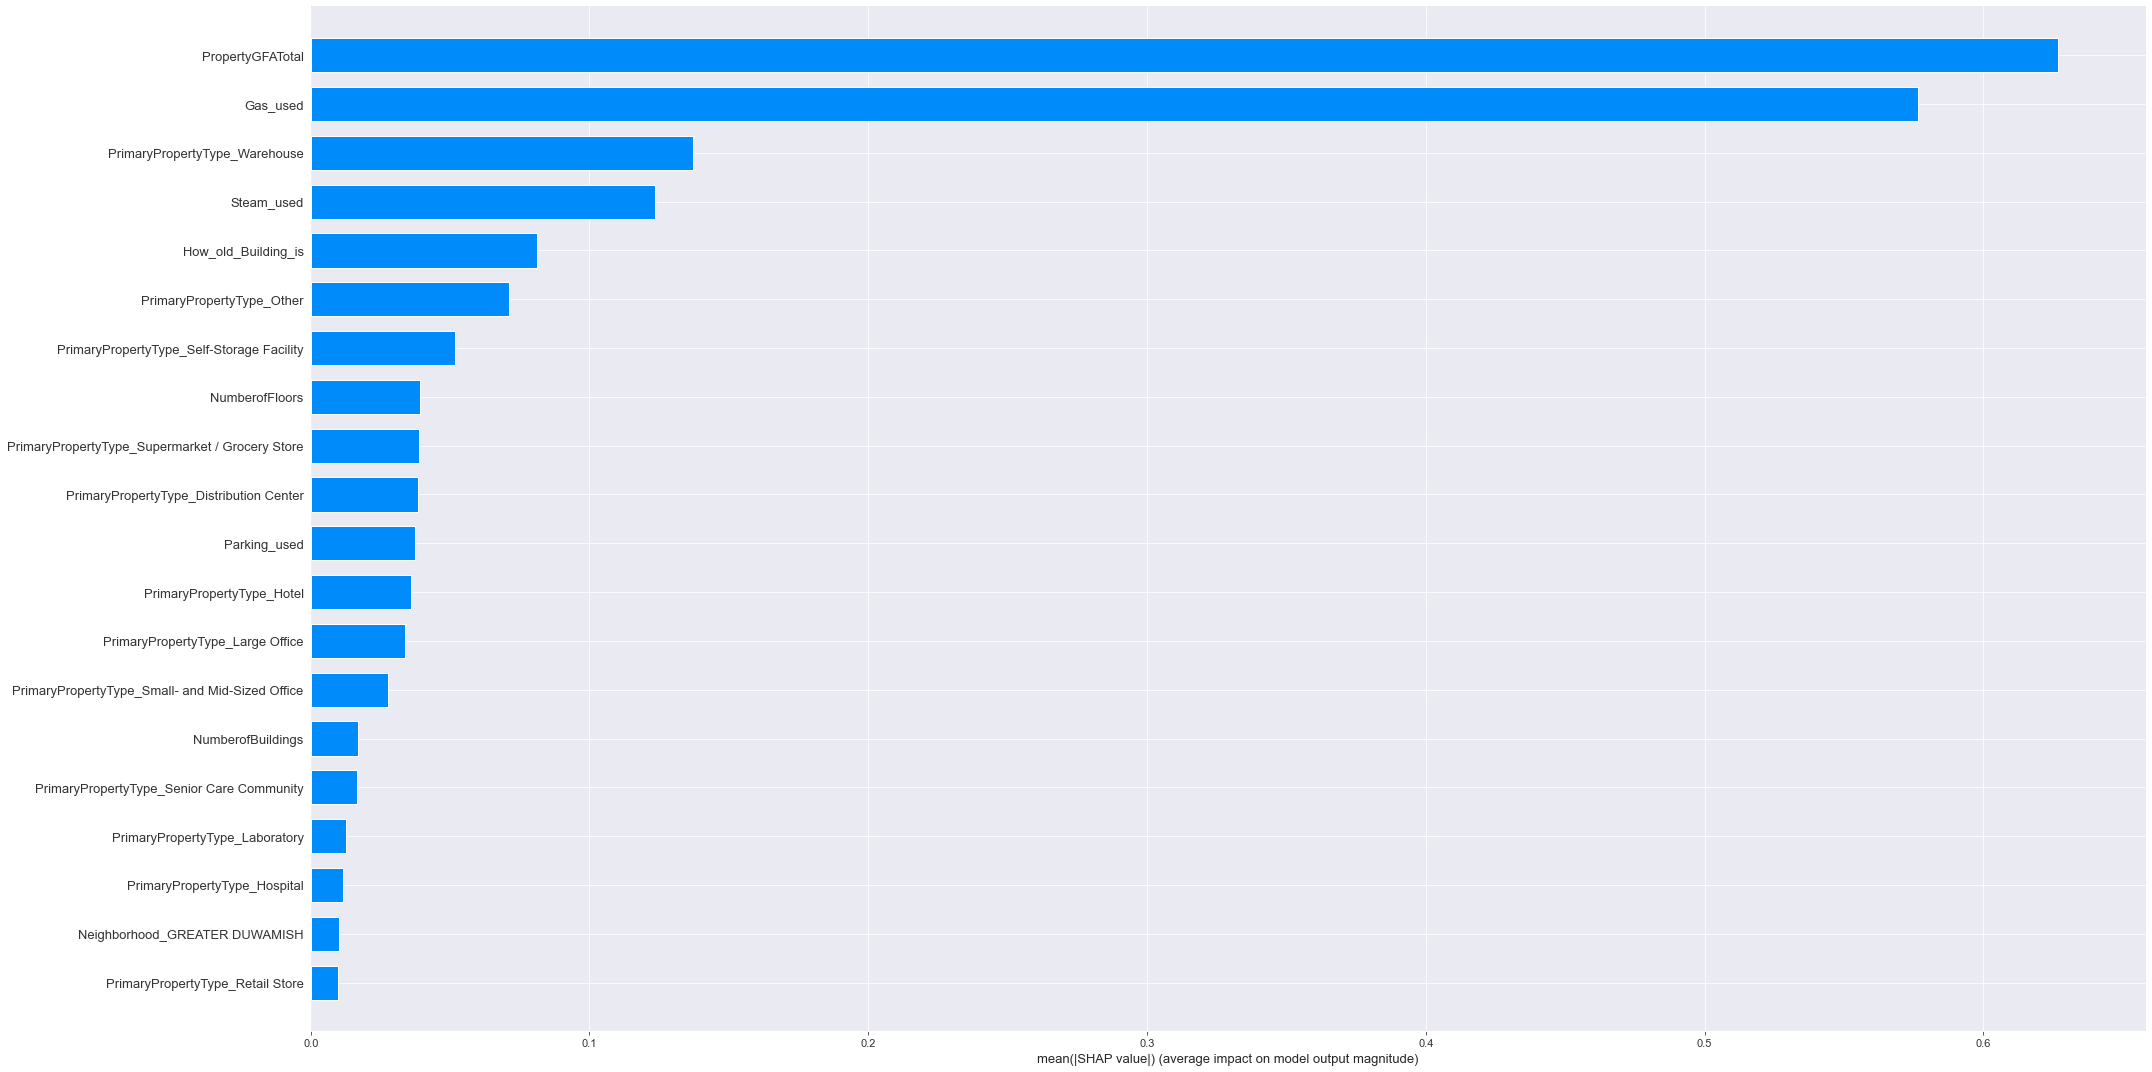

In [103]:

# Affichage du graphique avec les variables et leurs importances par rapport à la variable cible

shap.summary_plot(shap_values,                                                             # Use Shap values array
                  features = X_train,                                                      # Use training set features
                  feature_names = X.columns,                                               # Use column names
                  show = False,                                                            # Set to false to output to folder
                  plot_size = (30,15),                                                     # Change plot size
                  plot_type = 'bar'
                  )

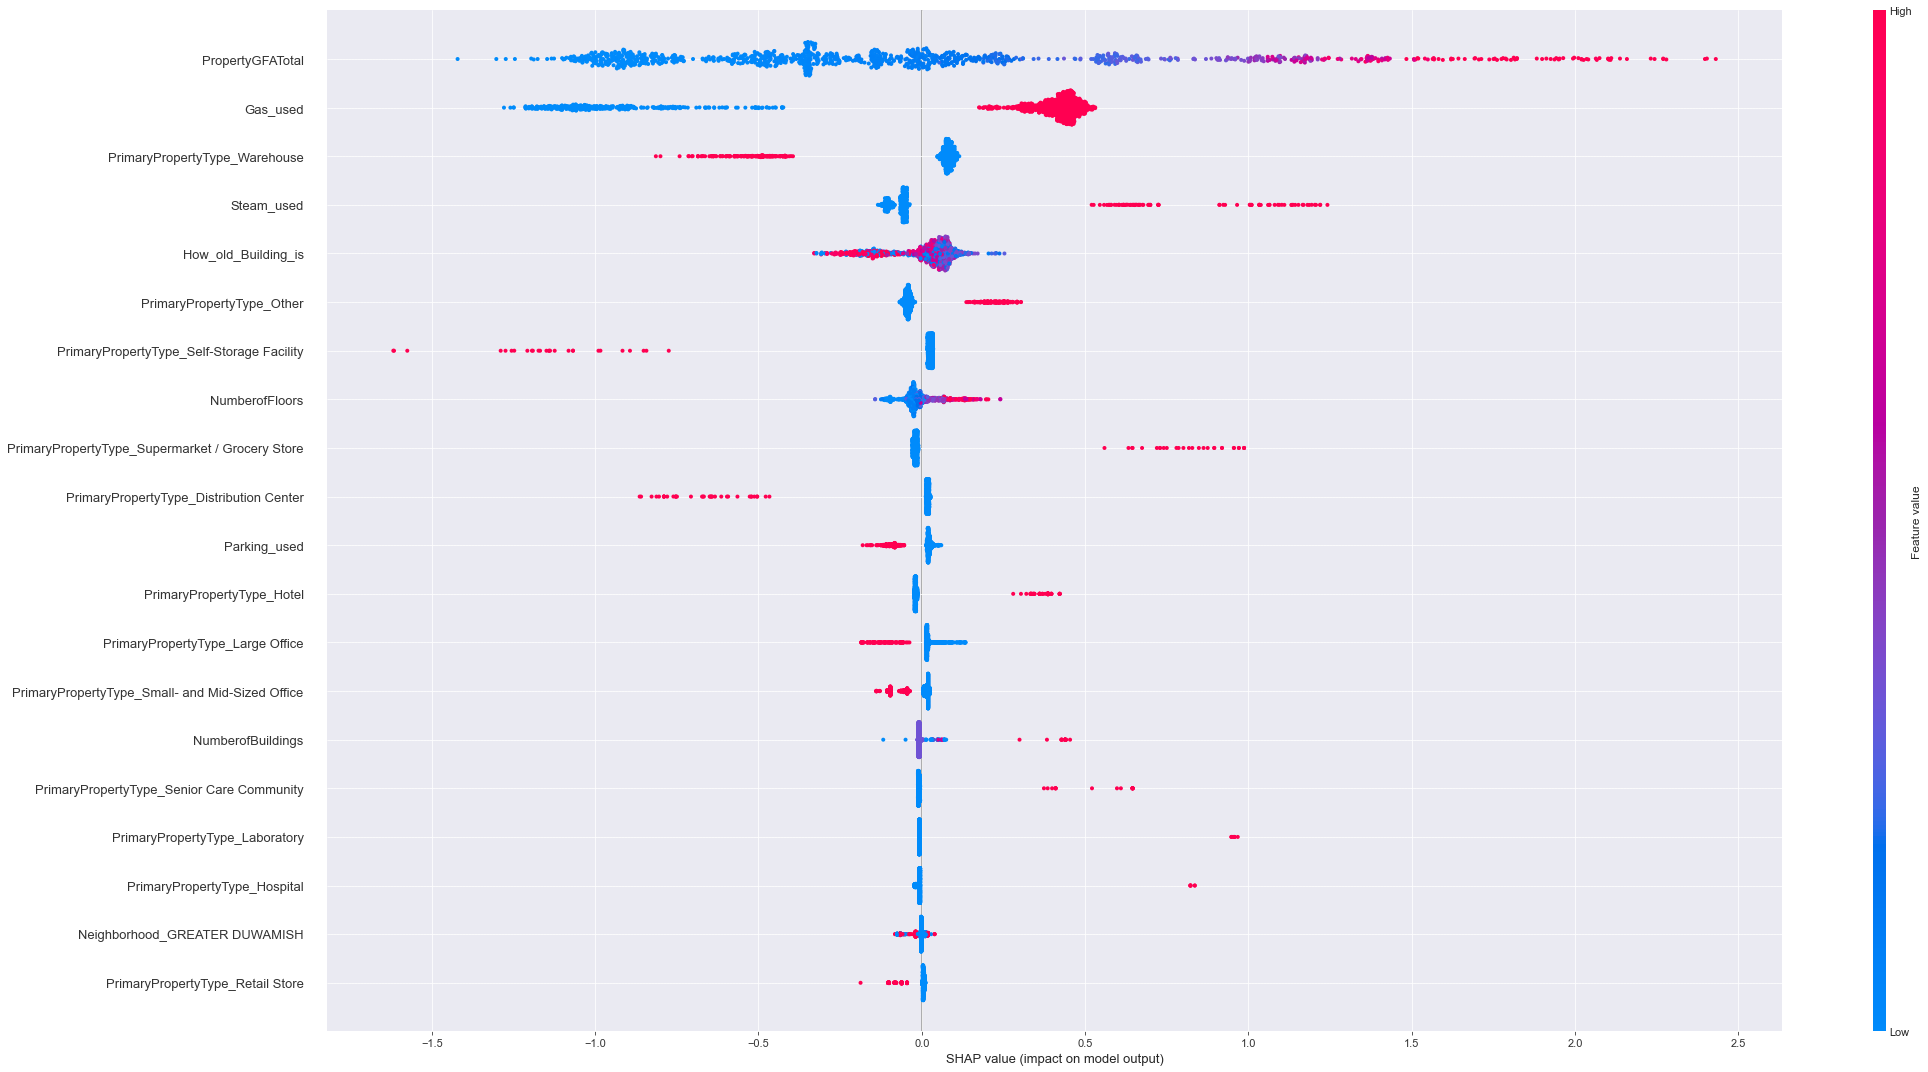

In [104]:
plt_shap = shap.summary_plot(shap_values,                           # Use Shap values array
                             features = X_train,                    # Use training set features
                             feature_names = X.columns,             # Use column names
                             show = False,                          # Set to false to output to folder
                             plot_size = (30,15))                   # Change plot size

##
## Section 5 : Avec l'ajout de la features "ENERGYSTARScore"

In [105]:

# On sélectionne nos variables et on ajoute la variable 'ENERGYSTARScore'

df20 = df6[['PrimaryPropertyType','Neighborhood', 'PropertyGFATotal', 'Parking_used', 'NumberofBuildings', 'NumberofFloors', 'How_old_Building_is', 'Electricity_used', 'Gas_used', 'Steam_used', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]
df20

,PrimaryPropertyType,Neighborhood,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,Hotel,DOWNTOWN,88434,0,1.0,12,95,1,1,1,60.0,7.456910e+06,249.98
1,Hotel,DOWNTOWN,103566,1,1.0,11,26,1,1,0,61.0,8.664479e+06,295.86
2,Hotel,DOWNTOWN,956110,1,1.0,41,53,1,1,1,43.0,7.393711e+07,2089.28
3,Hotel,DOWNTOWN,61320,0,1.0,10,96,1,1,1,56.0,6.946800e+06,286.43
4,Hotel,DOWNTOWN,175580,1,1.0,18,42,1,1,0,75.0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Office,GREATER DUWAMISH,12294,0,1.0,1,32,1,1,0,46.0,9.430032e+05,20.94
3372,Other,DOWNTOWN,16000,0,1.0,1,18,1,1,0,NaN,1.053706e+06,32.17
3373,Other,MAGNOLIA / QUEEN ANNE,13157,0,1.0,1,48,1,1,0,NaN,6.053764e+06,223.54
3374,Mixed Use Property,GREATER DUWAMISH,14101,0,1.0,1,33,1,1,0,NaN,7.828413e+05,22.11


In [106]:
# Nous préparons nos données pour le One-hot encoding
# Nous séparons les variables catégorielles

categorial_df20 = df20.select_dtypes(include = 'object')
categorial_df20

,PrimaryPropertyType,Neighborhood
0,Hotel,DOWNTOWN
1,Hotel,DOWNTOWN
2,Hotel,DOWNTOWN
3,Hotel,DOWNTOWN
4,Hotel,DOWNTOWN
...,...,...
3371,Office,GREATER DUWAMISH
3372,Other,DOWNTOWN
3373,Other,MAGNOLIA / QUEEN ANNE
3374,Mixed Use Property,GREATER DUWAMISH


In [107]:

# Nous séparons les variables numériques

numerical_df20 = df20.select_dtypes(include = ('int32', 'int64', 'float64'))
numerical_df20

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,88434,0,1.0,12,95,1,1,1,60.0,7.456910e+06,249.98
1,103566,1,1.0,11,26,1,1,0,61.0,8.664479e+06,295.86
2,956110,1,1.0,41,53,1,1,1,43.0,7.393711e+07,2089.28
3,61320,0,1.0,10,96,1,1,1,56.0,6.946800e+06,286.43
4,175580,1,1.0,18,42,1,1,0,75.0,1.465650e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,46.0,9.430032e+05,20.94
3372,16000,0,1.0,1,18,1,1,0,NaN,1.053706e+06,32.17
3373,13157,0,1.0,1,48,1,1,0,NaN,6.053764e+06,223.54
3374,14101,0,1.0,1,33,1,1,0,NaN,7.828413e+05,22.11


In [108]:

# Visualisation des valeurs manquantes

numerical_df20.isna().sum()

PropertyGFATotal           0
Parking_used               0
NumberofBuildings          0
NumberofFloors             0
How_old_Building_is        0
Electricity_used           0
Gas_used                   0
Steam_used                 0
ENERGYSTARScore          528
SiteEnergyUseWN(kBtu)      0
TotalGHGEmissions          0
dtype: int64

In [109]:

# Création des variables dummies

categorial_df20_dummies = pd.get_dummies(categorial_df20)
categorial_df20_dummies

,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3374,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [110]:

# Concaténation des variables créées

df21 = pd.concat([numerical_df20, categorial_df20_dummies], axis = 1)
df21

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,ENERGYSTARScore,SiteEnergyUseWN(kBtu),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,60.0,7.456910e+06,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,61.0,8.664479e+06,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,43.0,7.393711e+07,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,56.0,6.946800e+06,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,75.0,1.465650e+07,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,46.0,9.430032e+05,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,NaN,1.053706e+06,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,NaN,6.053764e+06,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,NaN,7.828413e+05,...,1,0,0,0,0,0,0,0,0,0


In [111]:

# Nous passons les variables à prédire au log

df21['SiteEnergyUseWN(kBtu)'] = np.log(df21['SiteEnergyUseWN(kBtu)'])
df21['TotalGHGEmissions'] = np.log(df21['TotalGHGEmissions'])
df21

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,ENERGYSTARScore,SiteEnergyUseWN(kBtu),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,1.0,12,95,1,1,1,60.0,15.824652,...,0,0,0,0,0,0,0,0,0,0
1,103566,1,1.0,11,26,1,1,0,61.0,15.974742,...,0,0,0,0,0,0,0,0,0,0
2,956110,1,1.0,41,53,1,1,1,43.0,18.118725,...,0,0,0,0,0,0,0,0,0,0
3,61320,0,1.0,10,96,1,1,1,56.0,15.753792,...,0,0,0,0,0,0,0,0,0,0
4,175580,1,1.0,18,42,1,1,0,75.0,16.500395,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,12294,0,1.0,1,32,1,1,0,46.0,13.756825,...,1,0,0,0,0,0,0,0,0,0
3372,16000,0,1.0,1,18,1,1,0,NaN,13.867824,...,0,0,0,0,0,0,0,0,0,0
3373,13157,0,1.0,1,48,1,1,0,NaN,15.616191,...,0,0,1,0,0,0,0,0,0,0
3374,14101,0,1.0,1,33,1,1,0,NaN,13.570685,...,1,0,0,0,0,0,0,0,0,0


In [112]:
# On crée X et y

y3 = df21['TotalGHGEmissions']
X3 = df21.drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],axis = 1)


In [113]:
X3.columns

Index(['PropertyGFATotal', 'Parking_used', 'NumberofBuildings',
       'NumberofFloors', 'How_old_Building_is', 'Electricity_used', 'Gas_used',
       'Steam_used', 'ENERGYSTARScore',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Sup

In [114]:

# On sépare jeu d'entrainement / jeu de test

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 50)


In [115]:
X3_train

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,ENERGYSTARScore,PrimaryPropertyType_Distribution Center,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
972,41790,0,1.0,2,53,1,1,0,NaN,0,...,1,0,0,0,0,0,0,0,0,0
3109,24697,0,1.0,1,57,1,1,0,NaN,0,...,0,0,0,1,0,0,0,0,0,0
341,159700,1,1.0,5,19,1,1,0,NaN,0,...,0,1,0,0,0,0,0,0,0,0
2147,51664,0,3.0,1,34,1,1,0,NaN,0,...,1,0,0,0,0,0,0,0,0,0
2783,74840,0,1.0,2,35,1,1,0,48.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,96910,1,1.0,6,20,1,1,0,56.0,0,...,0,0,1,0,0,0,0,0,0,0
185,128766,0,1.0,7,108,1,1,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2721,33018,0,1.0,4,97,1,1,0,49.0,0,...,0,0,0,0,0,0,0,0,0,0
146,50292,0,1.0,2,96,1,0,0,NaN,0,...,0,0,1,0,0,0,0,0,0,0


In [116]:

# On utilise le KNNImputer pour remplacer les valeurs manquantes

knn = KNNImputer(n_neighbors = 10)

In [117]:

# On entraîne et on transforme

kn_n = knn.fit_transform(X3_train)

In [118]:

# On affiche la DataFrame obtenu

X3_train = pd.DataFrame(kn_n, columns = X3_train.columns)
X3_train

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,ENERGYSTARScore,PrimaryPropertyType_Distribution Center,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,41790.0,0.0,1.0,2.0,53.0,1.0,1.0,0.0,53.1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24697.0,0.0,1.0,1.0,57.0,1.0,1.0,0.0,63.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,159700.0,1.0,1.0,5.0,19.0,1.0,1.0,0.0,59.8,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51664.0,0.0,3.0,1.0,34.0,1.0,1.0,0.0,58.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74840.0,0.0,1.0,2.0,35.0,1.0,1.0,0.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,96910.0,1.0,1.0,6.0,20.0,1.0,1.0,0.0,56.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1208,128766.0,0.0,1.0,7.0,108.0,1.0,1.0,0.0,64.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1209,33018.0,0.0,1.0,4.0,97.0,1.0,1.0,0.0,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,50292.0,0.0,1.0,2.0,96.0,1.0,0.0,0.0,61.6,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:

# On transforme X3_test sans le fit

kn_nt = knn.transform(X3_test)

In [120]:

# On affiche X3_test

X3_test = pd.DataFrame(kn_nt, columns = X3_test.columns)
X3_test

,PropertyGFATotal,Parking_used,NumberofBuildings,NumberofFloors,How_old_Building_is,Electricity_used,Gas_used,Steam_used,ENERGYSTARScore,PrimaryPropertyType_Distribution Center,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88592.0,1.0,1.0,6.0,21.0,1.0,1.0,0.0,84.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,40029.0,0.0,1.0,2.0,40.0,1.0,0.0,0.0,69.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20484.0,0.0,1.0,1.0,68.0,1.0,1.0,0.0,69.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54015.0,0.0,1.0,5.0,40.0,1.0,0.0,0.0,75.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71283.0,0.0,1.0,3.0,106.0,1.0,1.0,0.0,41.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,41704.0,1.0,1.0,4.0,32.0,1.0,1.0,0.0,73.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
299,34545.0,0.0,1.0,3.0,42.0,1.0,0.0,0.0,29.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,64984.0,0.0,1.0,1.0,56.0,1.0,1.0,0.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,31300.0,0.0,1.0,1.0,44.0,1.0,1.0,0.0,89.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##
#### Entrainement du modèle et prédiction

In [121]:

# Mise à l'échelle des données

scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

In [122]:

# On entraîne notre modèle sur nos nouvelles données

modelxgboost = XGBRegressor(learning_rate = 0.1, subsample = 0.7, max_depth = 4, gamma = 0.5, alpha = 1)

modelxgboost.fit(X3_train, y3_train, eval_metric = 'rmse', eval_set = [(X3_test, y3_test)])

[0]	validation_0-rmse:3.49349
[1]	validation_0-rmse:3.17929
[2]	validation_0-rmse:2.90068
[3]	validation_0-rmse:2.64833
[4]	validation_0-rmse:2.42807
[5]	validation_0-rmse:2.22637
[6]	validation_0-rmse:2.05067
[7]	validation_0-rmse:1.89406
[8]	validation_0-rmse:1.75703
[9]	validation_0-rmse:1.63702
[10]	validation_0-rmse:1.52730
[11]	validation_0-rmse:1.43209


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.34819
[13]	validation_0-rmse:1.27682
[14]	validation_0-rmse:1.21135
[15]	validation_0-rmse:1.15229
[16]	validation_0-rmse:1.09945
[17]	validation_0-rmse:1.05334
[18]	validation_0-rmse:1.01869
[19]	validation_0-rmse:0.98777
[20]	validation_0-rmse:0.96112
[21]	validation_0-rmse:0.93710
[22]	validation_0-rmse:0.91308
[23]	validation_0-rmse:0.89726
[24]	validation_0-rmse:0.88257
[25]	validation_0-rmse:0.87063
[26]	validation_0-rmse:0.85558
[27]	validation_0-rmse:0.84561
[28]	validation_0-rmse:0.83611
[29]	validation_0-rmse:0.82595
[30]	validation_0-rmse:0.81752
[31]	validation_0-rmse:0.80828
[32]	validation_0-rmse:0.80283
[33]	validation_0-rmse:0.79881
[34]	validation_0-rmse:0.79337
[35]	validation_0-rmse:0.78885
[36]	validation_0-rmse:0.78313
[37]	validation_0-rmse:0.77994
[38]	validation_0-rmse:0.77670
[39]	validation_0-rmse:0.77380
[40]	validation_0-rmse:0.76903
[41]	validation_0-rmse:0.76574
[42]	validation_0-rmse:0.76096
[43]	validation_0-rmse:0.75950
[44]	val

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1, ...)

In [123]:

# On affiche la prédiction

y3_pred = modelxgboost.predict(X3_test)

In [124]:

# On utilise une fonction inverse pour la mise au log de départ

y3_pred = transformer.inverse_transform(y3_pred)
y3_pred

array([4.5591464, 2.1839397, 3.3139796, 2.981234 , 3.8897173, 3.902295 ,
       4.3022513, 4.0146823, 3.4415808, 4.6433992, 6.6011453, 5.1076274,
       3.6516755, 2.5846846, 2.1642842, 4.247931 , 6.235787 , 4.7460175,
       2.8570683, 6.589742 , 3.220429 , 3.7213292, 4.8909583, 6.060347 ,
       4.5419044, 4.3615813, 6.7266693, 1.4316875, 3.6119957, 3.174789 ,
       3.4263892, 4.8562236, 1.3520193, 3.955988 , 4.2489495, 1.8757033,
       3.521534 , 4.3648734, 3.6885905, 4.1846256, 5.1672363, 3.9855804,
       4.226902 , 5.1621003, 5.0684156, 4.9319944, 5.213564 , 2.693001 ,
       4.4709663, 4.6633625, 5.6332397, 2.8082774, 2.7826726, 4.2145076,
       5.1127887, 5.172451 , 4.9792647, 4.4698906, 4.2590995, 5.396412 ,
       3.810423 , 6.552367 , 4.5432057, 2.2170625, 6.794851 , 3.6700451,
       5.149159 , 4.3850656, 3.0664158, 5.2975993, 4.268834 , 3.449223 ,
       5.85777  , 4.977153 , 3.9419239, 2.0620801, 5.2672853, 4.7996993,
       2.3238988, 1.3795207, 4.971445 , 3.8238254, 

In [125]:

# On affiche le coefficient de détermination

r2_score(y3_test, y3_pred)


0.7616515616512926

In [126]:

# On affiche l'erreur absolue moyenne

mean_absolute_error(y3_test, y3_pred)


0.5341516732425855

In [127]:

# On affiche l'erreur quadratique moyenne

mse_ = mean_squared_error(y3_test, y3_pred)
mse_

0.49677511659879336

In [128]:

# On affiche la racine de l'erreur quadratique moyenne

rmse_ = np.sqrt(mse_)
rmse

0.7312568746991299

##
### Features Importance avec "ENERGYSTARScore"

In [129]:
classement_E = XGBRegressor(learning_rate = 0.1,
                          subsample = 0.7,
                          max_depth = 4,
                          gamma = 0.5,
                          alpha = 1
                          )



In [130]:

# On entraine notre modèle avec nos nouvelles valeurs

classement_E.fit(X3_train, y3_train)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1, ...)

In [131]:

print("Predictions du test set :")

y3_pred = classement_E.predict(X3_test)
y3_pred

Predictions du test set :


array([4.5591464, 2.1839397, 3.3139796, 2.981234 , 3.8897173, 3.902295 ,
       4.3022513, 4.0146823, 3.4415808, 4.6433992, 6.6011453, 5.1076274,
       3.6516755, 2.5846846, 2.1642842, 4.247931 , 6.235787 , 4.7460175,
       2.8570683, 6.589742 , 3.220429 , 3.7213292, 4.8909583, 6.060347 ,
       4.5419044, 4.3615813, 6.7266693, 1.4316875, 3.6119957, 3.174789 ,
       3.4263892, 4.8562236, 1.3520193, 3.955988 , 4.2489495, 1.8757033,
       3.521534 , 4.3648734, 3.6885905, 4.1846256, 5.1672363, 3.9855804,
       4.226902 , 5.1621003, 5.0684156, 4.9319944, 5.213564 , 2.693001 ,
       4.4709663, 4.6633625, 5.6332397, 2.8082774, 2.7826726, 4.2145076,
       5.1127887, 5.172451 , 4.9792647, 4.4698906, 4.2590995, 5.396412 ,
       3.810423 , 6.552367 , 4.5432057, 2.2170625, 6.794851 , 3.6700451,
       5.149159 , 4.3850656, 3.0664158, 5.2975993, 4.268834 , 3.449223 ,
       5.85777  , 4.977153 , 3.9419239, 2.0620801, 5.2672853, 4.7996993,
       2.3238988, 1.3795207, 4.971445 , 3.8238254, 

In [132]:

# On utilise Tree Shap pour expliquer les influences sur la cible, algorithme basé sur les modèles d'arbres de décisions

explainer_E = shap.TreeExplainer(classement_E)
shap_values_E = explainer_E.shap_values(X3_train)

# View shap values
print(shap_values_E)

[[-2.6445213e-01  2.3331860e-02 -7.5133047e-03 ...  0.0000000e+00
   4.6748217e-05 -4.8974296e-03]
 [-9.1090608e-01  2.5513211e-02 -7.5091640e-03 ...  0.0000000e+00
   4.6748217e-05 -4.9660127e-03]
 [ 9.7592258e-01 -9.0170488e-02 -7.0178541e-03 ...  0.0000000e+00
   4.6748217e-05 -4.8150797e-03]
 ...
 [-3.9987782e-01  2.5645388e-02 -7.4268840e-03 ...  0.0000000e+00
   4.6748217e-05 -4.8374278e-03]
 [-1.5508461e-01  2.2215908e-02 -7.2826291e-03 ...  0.0000000e+00
   3.6625959e-05 -5.2566528e-03]
 [-9.1484833e-01  2.3836453e-02 -7.4708848e-03 ...  0.0000000e+00
   4.6748217e-05 -4.9569905e-03]]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


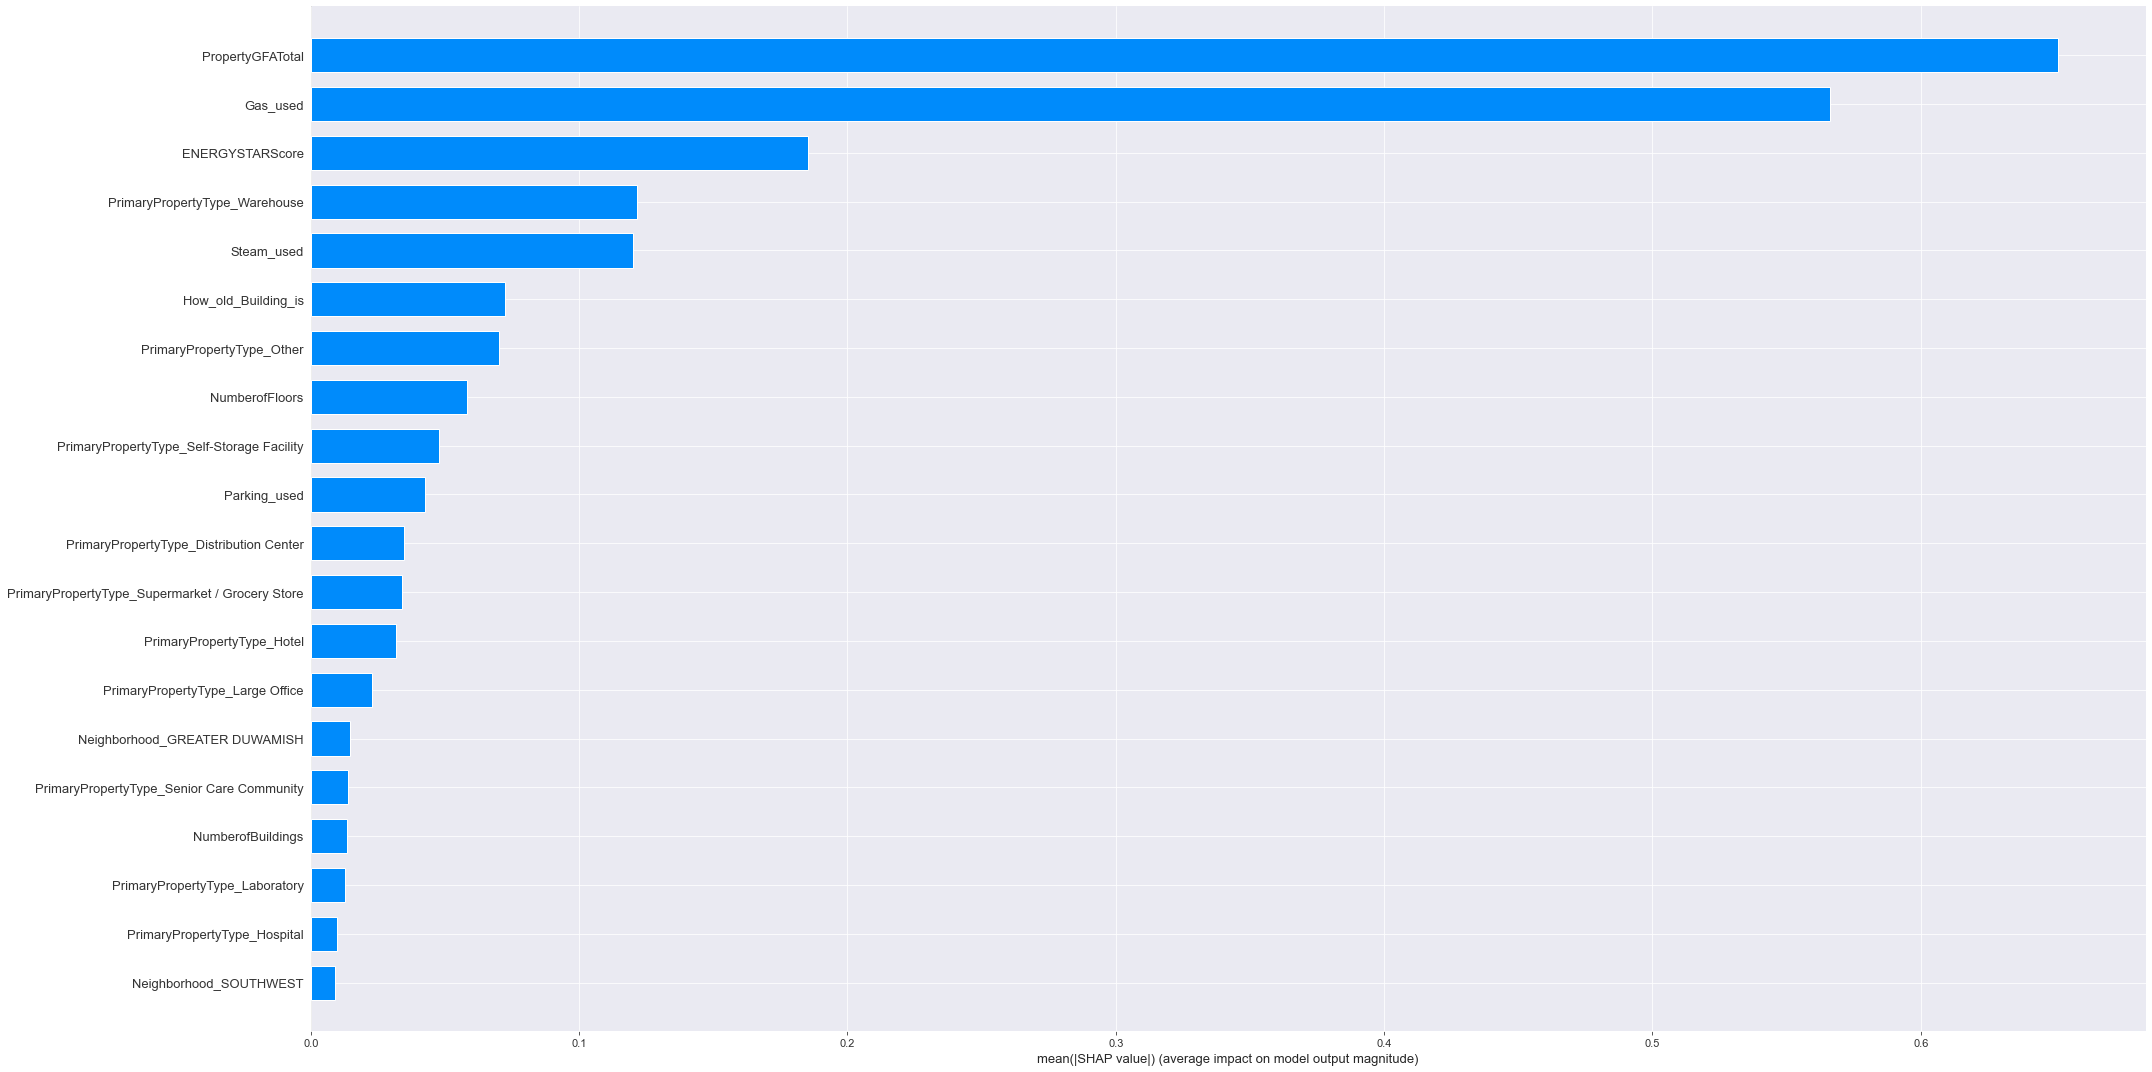

In [133]:

# Affichage du graphique avec les variables et leurs importances par rapport à la variable cible

shap.summary_plot(shap_values_E,                                                            # Use Shap values array
                  features = X3_train,                                                      # Use training set features
                  feature_names = X3.columns,                                               # Use column names
                  show = False,                                                             # Set to false to output to folder
                  plot_size = (30,15),                                                      # Change plot size
                  plot_type = 'bar'
                  )

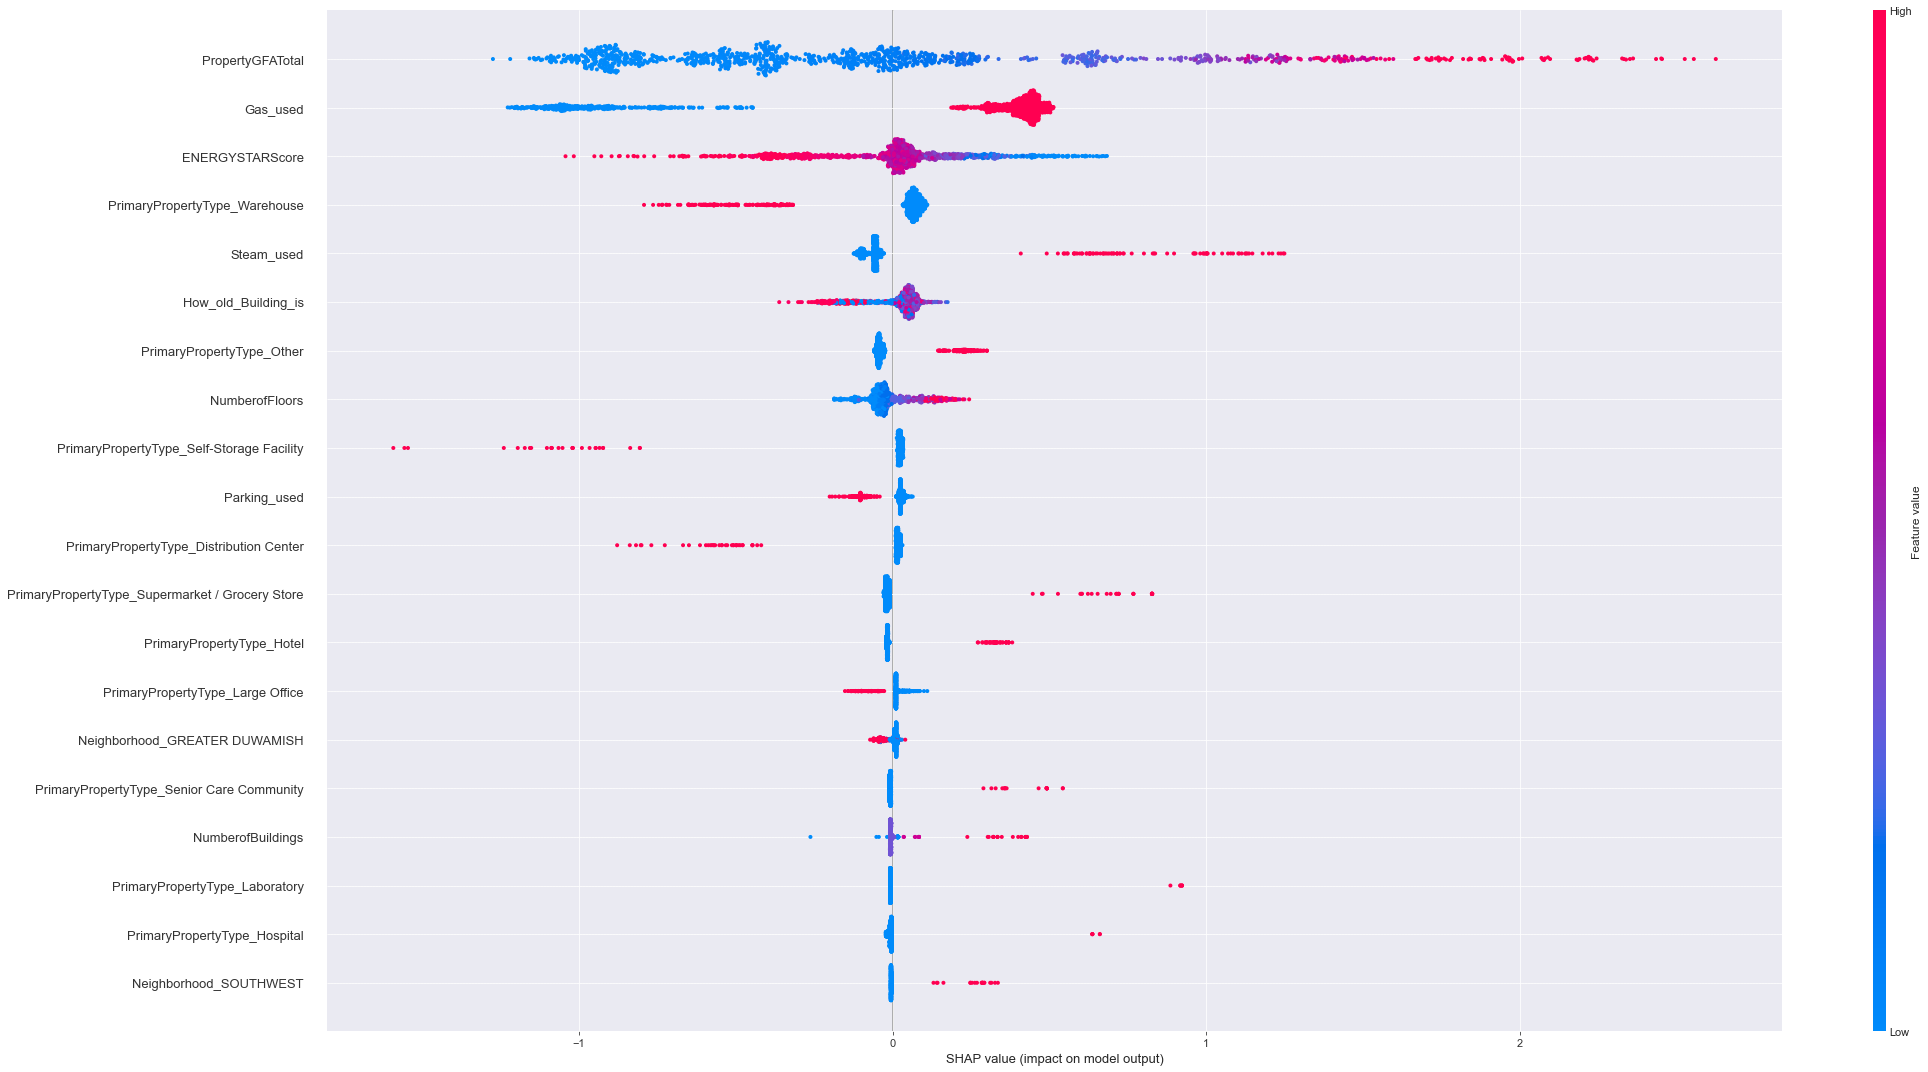

In [134]:

# Une autre manière de visualiser ces influences

plt_shap_E = shap.summary_plot(shap_values_E,                           # Use Shap values array
                             features = X3_train,                       # Use training set features
                             feature_names = X3.columns,                # Use column names
                             show = False,                              # Set to false to output to folder
                             plot_size = (30,15))                       # Change plot size